In [358]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import scipy.integrate as integrate
from iminuit import Minuit

In [359]:
#Daten einlesen Szinitllationsdetektor
with open('1_3CO_67849ms.txt') as data:
    adcvalue_coeich = np.loadtxt((line.replace(',', '.') for line in data), usecols= 0, delimiter=";")
with open('1_3CO_67849ms.txt') as data:
    counts_coeich = np.loadtxt((line.replace(',', '.') for line in data), usecols= 1, delimiter=";")

with open('1_3CS_70534ms.txt') as data:
    adcvalue_cseich = np.loadtxt((line.replace(',', '.') for line in data), usecols= 0, delimiter=";")
with open('1_3CS_70534ms.txt') as data:
    counts_cseich = np.loadtxt((line.replace(',', '.') for line in data), usecols= 1, delimiter=";")

with open('1_3NA_70358ms.txt') as data:
    adcvalue_naeich = np.loadtxt((line.replace(',', '.') for line in data), usecols= 0, delimiter=";")
with open('1_3NA_70358ms.txt') as data:
    counts_naeich = np.loadtxt((line.replace(',', '.') for line in data), usecols= 1, delimiter=";")


#Daten einlesen Gedetektor
with open('2_1_3_CO_70815ms.txt') as data:
    ge_adcvalue_coeich = np.loadtxt((line.replace(',', '.') for line in data), usecols= 0, delimiter=";")
with open('2_1_3_CO_70815ms.txt') as data:
    ge_counts_coeich = np.loadtxt((line.replace(',', '.') for line in data), usecols= 1, delimiter=";")

with open('2_1_3_CS_70386ms.txt') as data:
    ge_adcvalue_cseich = np.loadtxt((line.replace(',', '.') for line in data), usecols= 0, delimiter=";")
with open('2_1_3_CS_70386ms.txt') as data:
    ge_counts_cseich = np.loadtxt((line.replace(',', '.') for line in data), usecols= 1, delimiter=";")

with open('2_1_3_NA_70335ms.txt') as data:
    ge_adcvalue_naeich = np.loadtxt((line.replace(',', '.') for line in data), usecols= 0, delimiter=";")
with open('2_1_3_NA_70335ms.txt') as data:
    ge_counts_naeich = np.loadtxt((line.replace(',', '.') for line in data), usecols= 1, delimiter=";")

#Daten einlesen Kollimator
with open('1_5_4cm_rand_64778ms.txt') as data:
    KollimatorRand_adcvalue_cs = np.loadtxt((line.replace(',', '.') for line in data), usecols= 0, delimiter=";")
with open('1_5_4cm_rand_64778ms.txt') as data:
    KollimatorRand_counts_cs = np.loadtxt((line.replace(',', '.') for line in data), usecols= 1, delimiter=";")

with open('1_5_4cm_mitte_65537ms.txt') as data:
    KollimatorMittel_adcvalue_cs = np.loadtxt((line.replace(',', '.') for line in data), usecols= 0, delimiter=";")
with open('1_5_4cm_mitte_65537ms.txt') as data:
    KollimatorMitte_counts_cs = np.loadtxt((line.replace(',', '.') for line in data), usecols= 1, delimiter=";")

with open('1_6_CO_10cm_Abstand_0mm_Dicke_60523ms.txt') as data:
    Kollimator_adcvalue_co = np.loadtxt((line.replace(',', '.') for line in data), usecols= 0, delimiter=";")
with open('1_6_CO_10cm_Abstand_0mm_Dicke_60523ms.txt') as data:
    Kollimator_counts_co = np.loadtxt((line.replace(',', '.') for line in data), usecols= 1, delimiter=";")

with open('1_6_CS_10cm_Abstand_0mm_Dicke_60535ms.txt') as data:
    Kollimator_adcvalue_cs = np.loadtxt((line.replace(',', '.') for line in data), usecols= 0, delimiter=";")
with open('1_6_CS_10cm_Abstand_0mm_Dicke_60535ms.txt') as data:
    Kollimator_counts_cs = np.loadtxt((line.replace(',', '.') for line in data), usecols= 1, delimiter=";")

with open('2_1_5_mitte_65438ms.txt') as data:
    KollimatorGAmitte_adcvalue_cs = np.loadtxt((line.replace(',', '.') for line in data), usecols= 0, delimiter=";")
with open('2_1_5_mitte_65438ms.txt') as data:
    KollimatorGAmitte_counts_cs = np.loadtxt((line.replace(',', '.') for line in data), usecols= 1, delimiter=";")

with open('2_1_5_rand_66167ms.txt') as data:
    KollimatorGArand_adcvalue_cs = np.loadtxt((line.replace(',', '.') for line in data), usecols= 0, delimiter=";")
with open('2_1_5_rand_66167ms.txt') as data:
    KollimatorGArand_counts_cs = np.loadtxt((line.replace(',', '.') for line in data), usecols= 1, delimiter=";")


energy_calibration_y = []
energy_calibration_y_error = []
energy_calibration_y_sigma = []
energy_calibration_x = []



In [360]:
parameters = {'xtick.labelsize': 20, 'ytick.labelsize': 20}
plt.rcParams.update(parameters)

#Linearfit 
def line(x, a, b):
    return a + x * b

#Methoden Gaußfits für Mittelwerte
def gauss(x, H, A, x0, sigma):
    return A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

def lin_gauss(x, a,b, A, x0, sigma):
    return line(x,a,b) + A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

def lin_double_gauss(x, a,b, A1, x01, sigma1,A2, x02, sigma2):
    return line(x,a,b) + A1 * np.exp(-(x - x01) ** 2 / (2 * sigma1 ** 2)) + A2 * np.exp(-(x - x02) ** 2 / (2 * sigma2 ** 2))

#TODO: Doppelgaußfit und Linearer Untergrund 
#TODO: integral nicht 3 sigma sondern über \sqrt(2pi) sigma A
#Gaußfits
def lin_fit(x,y,startparameter):
    popt, pcov = curve_fit(line, x, y, p0=startparameter, absolute_sigma=True)
    return popt,pcov

def gauss_fit(x, y):
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
    popt, pcov = curve_fit(gauss, x, y, p0=[min(y), max(y), mean, sigma], absolute_sigma=True)
    return popt[0], popt[1] , popt[2], popt[3], np.sqrt(pcov[1,1]),np.sqrt(pcov[2,2]), np.sqrt(pcov[3,3])

def lin_gauss_fit(x, y, startparameter):
    #mean = sum(x * y) / sum(y)
    #sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
    popt, pcov = curve_fit(lin_gauss, x, y, p0=startparameter, absolute_sigma=True)
    #print(pcov)
    #print(0,-1, max(y), mean, sigma)
    #return popt, np.sqrt(np.diag(pcov))
    return popt[0], popt[1] , popt[2], popt[3],popt[4], np.sqrt(pcov[0,0]) , np.sqrt(pcov[1,1]),np.sqrt(pcov[2,2]), np.sqrt(pcov[3,3]), np.sqrt(pcov[4,4])

def lin_double_gauss_fit(x, y, startparameter):
    #mean = sum(x * y) / sum(y)
    #sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
    popt, pcov = curve_fit(lin_double_gauss, x, y, p0=startparameter, absolute_sigma=True)
    #print(0,-1, max(y), mean, sigma)
    #return popt, np.sqrt(np.diag(pcov))
    return popt[0], popt[1] , popt[2], popt[3],popt[4], popt[5], popt[6],popt[7],np.sqrt(pcov[0,0]) , np.sqrt(pcov[1,1]),np.sqrt(pcov[2,2]), np.sqrt(pcov[3,3]), np.sqrt(pcov[4,4]), np.sqrt(pcov[5,5]), np.sqrt(pcov[6,6]), np.sqrt(pcov[7,7])

#a, b, A, x0, sigma, afehler, bfehler, Afehler, x0fehler, sigmafehler

# least-squares score function = sum of data residuals squared
def LSQ(a, b,x,y,sigma_y):
    return np.sum((y - line(x, a, b)) ** 2 / sigma_y ** 2)

Amplitude A Na 511: 652.145803378213
Amplitude A Fehler Na 511: 0.10932702985565357
Erwartungswert mu Na 511: 5.290448196132377
Erwartungswert mu Fehler Na 511: 0.000036
Standardabweichung sigma Na 511: 0.18772637172123022
Standardabweichung sigma Fehler Na 511: 0.000038
Kalibrierungsfaktor Na 511: 96.58916996362814
Feher Kalibrierungsfaktor Na 511: 0.035484
Energieauflösung Na 511: 0.08356569871021526
Fehler Energieauflösung Na 511: 0.000016
Anzahl gemessener Events in 3 sigma Intervall:  (612.090766306629, 6.795572568205066e-12)
Anzahl gemessener Events aus Analytischem Integral:  613.7477600931619
Anzahl gemessener Events aus Analytischem Integral Fehler:  0.162210220987114
Amplitude A Na 1275: 207.85290128422707
Amplitude A Fehler Na 1275: 0.18038371143834292
Erwartungswert mu Na 1275: 12.202460893541653
Erwartungswert mu Fehler Na 1275: 0.000299
Standardabweichung sigma Na 1275: 0.30580605300501684
Standardabweichung sigma Fehler Na 1275: 0.000349
Kalibrierungsfaktor Na 1275: 104.

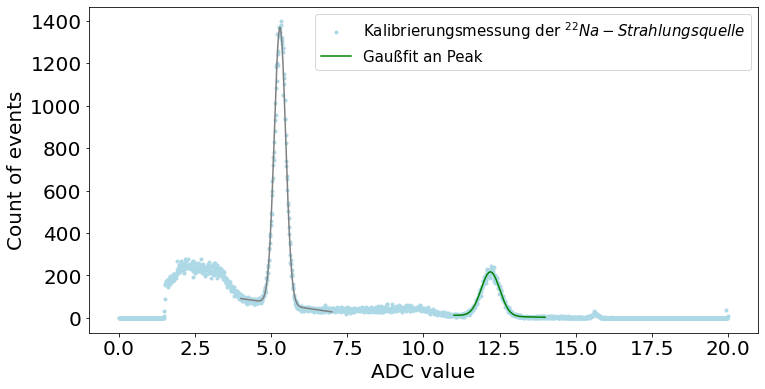

In [361]:
#na-Eichung Szintillationsdetektor
adc = adcvalue_naeich
count = counts_naeich


gaussstart = 400
gaussstop = 700
gaussstart2 = 1100
gaussstop2 = 1400

parameters = {'xtick.labelsize': 20, 'ytick.labelsize': 20}
plt.rcParams.update(parameters)

#Energyspectrum open LG
fig, ax = plt.subplots(figsize=(12,6))

#Name for axis
ax.set_xlabel('ADC value', fontsize=20)
ax.set_ylabel('Count of events', fontsize=20)
#Plotten der unskalierten Kurven
ax.plot(adc, count,'o',markersize=3, color = "lightblue",label = "Kalibrierungsmessung der $^{22}Na-Strahlungsquelle$")
#ax.set_ylim(0,)
# ax.vlines(4,0,400)
# ax.vlines(7,0,400)
# ax.vlines(11,0,400)
# ax.vlines(14,0,400)


#Gauß 511
startparameter = 200, -10, 1400, 5.3,0.3
a, b, A, x0, sigma, afehler, bfehler, Afehler, x0fehler, sigmafehler = lin_gauss_fit(adc[gaussstart:gaussstop] , count[gaussstart:gaussstop],startparameter)
#print(a, b, A, x0, sigma)
#print('MW:',round(x,3), 'pm', np.sqrt(fehlermü), 'SD:', round(sigma,3), 'pm', np.sqrt(fehlersd))
FWHM = round(2.35482 * sigma,4)
#print('FWHM:',FWHM11)
#ax.vlines(gaussstart,0,5000)
#ax.vlines(gaussstop,0,5000)

ax.plot(adc[gaussstart:gaussstop], lin_gauss(adc[gaussstart:gaussstop], a, b,A,x0,sigma), color = "green")
photopeak = 511
calibrationfactor = photopeak / x0 
calibrationfactorfehler = sigma/x0
print("Amplitude A Na 511:",A/2)
print("Amplitude A Fehler Na 511:",Afehler/2)
print("Erwartungswert mu Na 511:",x0)
print("Erwartungswert mu Fehler Na 511:",'{:f}'.format(x0fehler))
print("Standardabweichung sigma Na 511:",sigma)
print("Standardabweichung sigma Fehler Na 511:",'{:f}'.format(sigmafehler))
print("Kalibrierungsfaktor Na 511:",calibrationfactor)
print("Feher Kalibrierungsfaktor Na 511:",'{:f}'.format(calibrationfactorfehler))
print("Energieauflösung Na 511:", FWHM/x0)
energieaufloesungFehler=np.sqrt((2.35482/x0)**2*sigmafehler**2-(2.35482*sigma/(x0**2))*x0fehler**2)
print("Fehler Energieauflösung Na 511:", '{:f}'.format(energieaufloesungFehler))
energy_calibration_y.append(x0)
energy_calibration_y_error.append(x0fehler)
energy_calibration_y_sigma.append(sigma)
energy_calibration_x.append(photopeak)
#Intensity using integral
sigmax3integration = integrate.quad(lambda integrator: gauss(integrator,0, A, x0, sigma),x0-3*sigma,x0+3*sigma)
print("Anzahl gemessener Events in 3 sigma Intervall: ", sigmax3integration)
analiticIntegral = A*sigma*np.sqrt(2*np.pi)
analiticalIntergralFehler = np.sqrt(2*np.pi)*np.sqrt((sigma*Afehler)**2+(A*sigmafehler)**2)
print("Anzahl gemessener Events aus Analytischem Integral: ", analiticIntegral)
print("Anzahl gemessener Events aus Analytischem Integral Fehler: ", analiticalIntergralFehler)


#Gauß 1275
startparameter = 200, -1, 200, 12.5, 1
#ax.plot(adc[gaussstart:gaussstop] , count[gaussstart:gaussstop], color = "grey", label="Gaußfit an Kalibrierungsmessung")
a, b, A1, x01, sigma1,afehler, bfehler, Afehler1, x0fehler1, sigmafehler1= lin_gauss_fit(adc[gaussstart2:gaussstop2] , count[gaussstart2:gaussstop2],startparameter)
FWHM = round(2.35482 * sigma,4)
#ax.vlines(gaussstart,0,5000)
#ax.vlines(gaussstop,0,5000)
ax.plot(adc[gaussstart2:gaussstop2], lin_gauss(adc[gaussstart2:gaussstop2], a, b,A1, x01, sigma1), color = "green", label="Gaußfit an Peak")

na_photopeak1 = 1275
calibrationfactor1 = na_photopeak1 / x01
calibrationfactorfehler1 = sigmafehler1/x01
print("Amplitude A Na 1275:",A1)
print("Amplitude A Fehler Na 1275:",Afehler1)
print("Erwartungswert mu Na 1275:",x01)
print("Erwartungswert mu Fehler Na 1275:",'{:f}'.format(x0fehler1))
print("Standardabweichung sigma Na 1275:",sigma1)
print("Standardabweichung sigma Fehler Na 1275:",'{:f}'.format(sigmafehler1))
print("Kalibrierungsfaktor Na 1275:",calibrationfactor1)
print("Feher Kalibrierungsfaktor Na 1275:",'{:f}'.format(calibrationfactorfehler1))
print("Energieauflösung Na 1275:", FWHM/x01)
energieaufloesungFehler=np.sqrt((2.35482/x01)**2*sigmafehler1**2-(2.35482*sigma1/(x01**2))*x0fehler1**2)
print("Fehler Energieauflösung Na 1275:", '{:f}'.format(energieaufloesungFehler))
energy_calibration_y.append(x01)
energy_calibration_y_error.append(x0fehler1)
energy_calibration_y_sigma.append(sigma1)
energy_calibration_x.append(na_photopeak1)
#Intensity using integral
sigmax3integration = integrate.quad(lambda integrator: gauss(integrator,0, A1, x01, sigma1),x01-3*sigma1,x01+3*sigma1)
print("Anzahl gemessener Events in 3 sigma Intervall: ", sigmax3integration)

#Intensity using integral
analiticIntegral = A1*sigma1*np.sqrt(2*np.pi)
analiticalIntergralFehler = np.sqrt(2*np.pi)*np.sqrt((sigma1*Afehler1)**2+(A1*sigmafehler1)**2)
print("Anzahl gemessener Events aus Analytischem Integral: ", analiticIntegral)
print("Anzahl gemessener Events aus Analytischem Integral Fehler: ", analiticalIntergralFehler)

ax.legend(fontsize=15)
fig.savefig('Kalibrierungsmessung.png', dpi=200)

Amplitude A Co 1173: 168.06316043180703
Amplitude A Fehler Co 1173: 0.188939
Erwartungswert mu Co 1173: 10.848426293479294
Erwartungswert mu Fehler Co 1173: 0.000323
Standardabweichung sigma Co 1173: 0.2575248875426319
Standardabweichung sigma Fehler Co 1173: 0.000350
Kalibrierungsfaktor Co 1173: 96.58916996362814
Feher Kalibrierungsfaktor Co 1173: 0.035484
Energieauflösung Co 1173: 0.055897508412302274
Fehler Energieauflösung Co 1173: 0.000072
Anzahl gemessener Events aus Analytischem Integral:  108.48799091114078
Anzahl gemessener Events aus Analytischem Integral Fehler:  0.19144381256831586
Amplitude A Co 1333: 141.03871271550412
Amplitude A Fehler Co 1333: 0.183987
Erwartungswert mu Co 1333: 12.176452294004214
Erwartungswert mu Fehler Co 1333: 0.000397
Standardabweichung sigma Co 1333: 0.27351278792159633
Standardabweichung sigma Fehler Co 1333: 0.000434
Kalibrierungsfaktor Co 1333: 109.47359442753127
Feher Kalibrierungsfaktor Co 1333: 0.000036
Energieauflösung Co 1333: 0.052897180

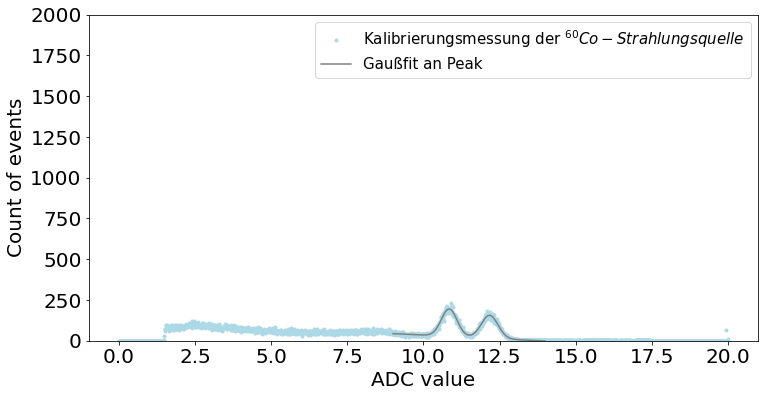

In [362]:
#co-Eichung Szintillationsdetektor
adc = adcvalue_coeich
count = counts_coeich

gaussstart = 900
gaussstop = 1400

parameters = {'xtick.labelsize': 20, 'ytick.labelsize': 20}
plt.rcParams.update(parameters)

#Energyspectrum open LG
fig, ax = plt.subplots(figsize=(12,6))

#Name for axis
ax.set_xlabel('ADC value', fontsize=20)
ax.set_ylabel('Count of events', fontsize=20)
#Plotten der unskalierten Kurven
ax.plot(adc, count,'o',markersize=3, color = "lightblue",label = "Kalibrierungsmessung der $^{60}Co-Strahlungsquelle$")


#Gauß 1.173
startparameter = 250,-1, 250, 11.0, 0.5,250, 12.0, 0.5
#ax.plot(adc[gaussstart:gaussstop] , count[gaussstart:gaussstop], color = "grey", label="Gaußfit an Kalibrierungsmessung")
a, b, A1, x01, sigma1, A2, x02, sigma2,afehler, bfehler, Afehler1, x0fehler1, sigmafehler1, Afehler2, x0fehler2, sigmafehler2 = lin_double_gauss_fit(adc[gaussstart:gaussstop] , count[gaussstart:gaussstop],startparameter)
FWHM1 = round(2.35482 * sigma1,4)
FWHM2 = round(2.35482 * sigma2,4)
#ax.vlines(gaussstart,0,5000)
#ax.vlines(gaussstop,0,5000)
ax.plot(adc[gaussstart:gaussstop], lin_double_gauss(adc[gaussstart:gaussstop], a, b,A1, x01, sigma1, A2, x02, sigma2), color = "grey", label="Gaußfit an Peak")

#Co-1173
photopeak1 = 1173
calibrationfactor1 = photopeak1 / x01 
calibrationfactorfehler1 = sigmafehler1/x01
print("Amplitude A Co 1173:",A1)
print("Amplitude A Fehler Co 1173:",'{:f}'.format(Afehler1))
print("Erwartungswert mu Co 1173:",x01)
print("Erwartungswert mu Fehler Co 1173:",'{:f}'.format(x0fehler1))
print("Standardabweichung sigma Co 1173:",sigma1)
print("Standardabweichung sigma Fehler Co 1173:",'{:f}'.format(sigmafehler1))
print("Kalibrierungsfaktor Co 1173:",calibrationfactor)
print("Feher Kalibrierungsfaktor Co 1173:",'{:f}'.format(calibrationfactorfehler))
print("Energieauflösung Co 1173:", FWHM1/x01)
energieaufloesungFehler=np.sqrt((2.35482/x01)**2*sigmafehler1**2-(2.35482*sigma1/(x01**2))*x0fehler1**2)
print("Fehler Energieauflösung Co 1173:", '{:f}'.format(energieaufloesungFehler))

energy_calibration_y.append(x01)
energy_calibration_y_error.append(x0fehler1)
energy_calibration_y_sigma.append(sigma1)
energy_calibration_x.append(photopeak1)
#Intensity using integral
sigmax3integration = integrate.quad(lambda integrator: gauss(integrator,0, A1, x01, sigma1),x01-3*sigma1,x01+3*sigma1)
analiticIntegral = A1*sigma1*np.sqrt(2*np.pi)
analiticalIntergralFehler = np.sqrt(2*np.pi)*np.sqrt((sigma1*Afehler1)**2+(A1*sigmafehler1)**2)
print("Anzahl gemessener Events aus Analytischem Integral: ", analiticIntegral)
print("Anzahl gemessener Events aus Analytischem Integral Fehler: ", analiticalIntergralFehler)

#Co-1333
photopeak2 = 1333
calibrationfactor2 = photopeak2 / x02
calibrationfactorfehler2 = sigmafehler2/x02
print("Amplitude A Co 1333:",A2)
print("Amplitude A Fehler Co 1333:",'{:f}'.format(Afehler2))
print("Erwartungswert mu Co 1333:",x02)
print("Erwartungswert mu Fehler Co 1333:",'{:f}'.format(x0fehler2))
print("Standardabweichung sigma Co 1333:",sigma2)
print("Standardabweichung sigma Fehler Co 1333:",'{:f}'.format(sigmafehler2))
print("Kalibrierungsfaktor Co 1333:",calibrationfactor2)
print("Feher Kalibrierungsfaktor Co 1333:",'{:f}'.format(calibrationfactorfehler2))
print("Energieauflösung Co 1333:", FWHM2/x02)
energieaufloesungFehler=np.sqrt((2.35482/x02)**2*sigmafehler2**2-(2.35482*sigma2/(x02**2))*x0fehler2**2)
print("Fehler Energieauflösung Co 1333:", '{:f}'.format(energieaufloesungFehler))
energy_calibration_y.append(x02)
energy_calibration_y_error.append(x0fehler2)
energy_calibration_y_sigma.append(sigma2)
energy_calibration_x.append(photopeak2)
#Intensity using integral
sigmax3integration = integrate.quad(lambda integrator: gauss(integrator,0, A2, x02, sigma2),x02-3*sigma2,x02+3*sigma2)
print("Anzahl gemessener Events in 3 sigma Intervall: ", sigmax3integration)
analiticIntegral = A2*sigma2*np.sqrt(2*np.pi)
analiticalIntergralFehler = np.sqrt(2*np.pi)*np.sqrt((sigma2*Afehler2)**2+(A2*sigmafehler2)**2)
print("Anzahl gemessener Events aus Analytischem Integral: ", analiticIntegral)
print("Anzahl gemessener Events aus Analytischem Integral Fehler: ", analiticalIntergralFehler)

plt.ylim(0,2000)
ax.legend(fontsize=15)
fig.savefig('Kalibrierungsmessung.png', dpi=200)

108.11647821323588 -14.023224689818415 1102.8013350362878 6.461086248591411 0.2066095428157891
Y-Abschnitt Cs 662 108.11647821323588
Steigung Cs 662 -14.023224689818415
Amplitude A Cs 662: 1102.8013350362878
Amplitude A Fehler Cs 662: 0.208803
Erwartungswert mu Cs 662: 6.461086248591411
Erwartungswert mu Fehler Cs 662: 0.000044
Standardabweichung sigma Cs 662: 0.2066095428157891
Standardabweichung sigma Fehler Cs 662: 0.000048
Kalibrierungsfaktor Cs 662: 102.45955161863431
Feher Kalibrierungsfaktor Cs 662: 0.000007
Energieauflösung Cs 662: 0.07529693634813533
Fehler Energieauflösung Cs 662: 0.000017
Anzahl gemessener Events aus Analytischem Integral:  571.133446721209
Anzahl gemessener Events aus Analytischem Integral Fehler:  0.17080008819097864
Anzahl gemessener Events in 3 sigma Intervall:  (569.591502890155, 6.3237360226758854e-12)
Comptonadc und -energie:  0.675 69.16019734257816


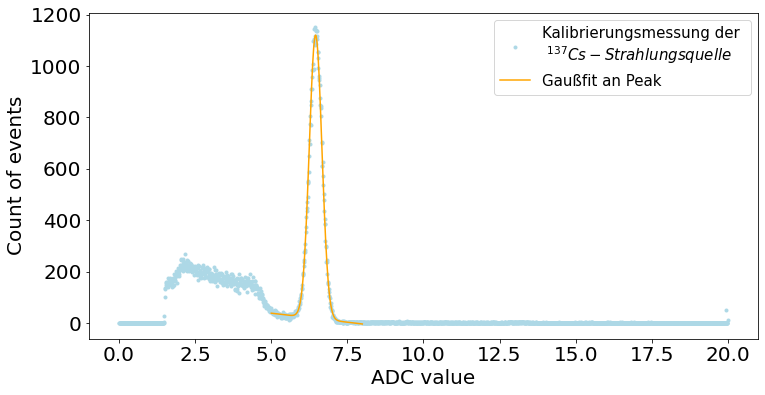

In [363]:
#cs-Eichung Szintialltionsdetektor
adc = adcvalue_cseich
count = counts_cseich

gaussstart = 500
gaussstop = 800

parameters = {'xtick.labelsize': 20, 'ytick.labelsize': 20}
plt.rcParams.update(parameters)

#Energyspectrum open LG
fig, ax = plt.subplots(figsize=(12,6))

#Name for axis
ax.set_xlabel('ADC value', fontsize=20)
ax.set_ylabel('Count of events', fontsize=20)
#Plotten der unskalierten Kurven
ax.plot(adc, count,'o',markersize=3, color = "lightblue",label = "Kalibrierungsmessung der \n $^{137}Cs-Strahlungsquelle$")

#Gauß 662
#H, A, x, sigma, Afehler, fehlermü, fehlersd = gauss_fit(adc[gaussstart:gaussstop] , count[gaussstart:gaussstop])

startparameter = 200, -5, 1200, 7.0, 0.5
#startparameter = 5000,-1, 15000, 100, 20
#ax.plot(adc[gaussstart:gaussstop] , count[gaussstart:gaussstop], color = "grey", label="Gaußfit an Kalibrierungsmessung")
a, b, A, x0, sigma, afehler, bfehler, Afehler, x0fehler, sigmafehler = lin_gauss_fit(adc[gaussstart:gaussstop] , count[gaussstart:gaussstop],startparameter)
print(a, b, A, x0, sigma)
#print('MW:',round(x,3), 'pm', np.sqrt(fehlermü), 'SD:', round(sigma,3), 'pm', np.sqrt(fehlersd))
FWHM = round(2.35482 * sigma,4)
#print('FWHM:',FWHM11)
#ax.vlines(gaussstart,0,5000)
#ax.vlines(gaussstop,0,5000)

ax.plot(adc[gaussstart:gaussstop], lin_gauss(adc[gaussstart:gaussstop], a, b,A,x0,sigma),color = "orange",markersize=10, label="Gaußfit an Peak")
photopeak = 662
calibrationfactor = photopeak / x0 
calibrationfactorfehler = sigmafehler/x0
print("Y-Abschnitt Cs 662", a)
print("Steigung Cs 662", b)
print("Amplitude A Cs 662:",A)
print("Amplitude A Fehler Cs 662:",'{:f}'.format(Afehler))
print("Erwartungswert mu Cs 662:",x0)
print("Erwartungswert mu Fehler Cs 662:",'{:f}'.format(x0fehler))
print("Standardabweichung sigma Cs 662:",sigma)
print("Standardabweichung sigma Fehler Cs 662:",'{:f}'.format(sigmafehler))
print("Kalibrierungsfaktor Cs 662:",calibrationfactor)
print("Feher Kalibrierungsfaktor Cs 662:",'{:f}'.format(calibrationfactorfehler))
print("Energieauflösung Cs 662:", FWHM/x0)
energieaufloesungFehler=np.sqrt((2.35482/x0)**2*sigmafehler**2-(2.35482*sigma/(x0**2))*x0fehler**2)
print("Fehler Energieauflösung Cs 662:", '{:f}'.format(energieaufloesungFehler))
energy_calibration_y.append(x0)
energy_calibration_y_error.append(x0fehler)
energy_calibration_y_sigma.append(sigma)
energy_calibration_x.append(photopeak)
#Intensity using integral
sigmax3integration = integrate.quad(lambda integrator: gauss(integrator,0, A, x0, sigma),x0-3*sigma,x0+3*sigma)
analiticIntegral = A*sigma*np.sqrt(2*np.pi)
analiticalIntergralFehler = np.sqrt(2*np.pi)*np.sqrt((sigma*Afehler)**2+(A*sigmafehler)**2)
print("Anzahl gemessener Events aus Analytischem Integral: ", analiticIntegral)
print("Anzahl gemessener Events aus Analytischem Integral Fehler: ", analiticalIntergralFehler)

print("Anzahl gemessener Events in 3 sigma Intervall: ", sigmax3integration)
print("Comptonadc und -energie: ", adc[67], calibrationfactor*adc[67])

ax.legend(fontsize=15)
fig.savefig('Kalibrierungsmessung.png', dpi=200)

Comptonkante: 4.859999999999999


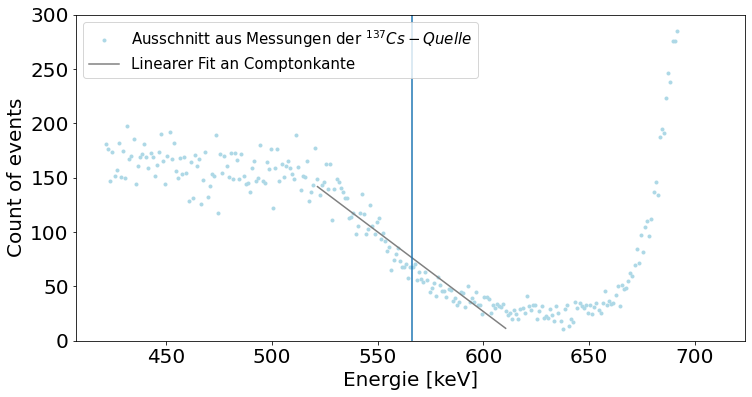

In [364]:
#Comptonkante Fit Cs Szintillationsdetektor
comptonstart = 441
comptonstop = 530
parameters = {'xtick.labelsize': 20, 'ytick.labelsize': 20}
plt.rcParams.update(parameters)

#Energyspectrum open LG
fig, ax = plt.subplots(figsize=(12,6))

#Name for axis
ax.set_xlabel('Energie [keV]', fontsize=20)
ax.set_ylabel('Count of events', fontsize=20)


#Plotten der unskalierten Kurven
ax.plot(100*adc[comptonstart-100:comptonstop+100]+80, count[comptonstart-100:comptonstop+100],'o',markersize=3, color = "lightblue",label = "Ausschnitt aus Messungen der $^{137}Cs-Quelle$")
plt.ylim(0,300)
# ax.vlines(4.4,000,300)
# ax.vlines(5.3,000,300)



#Fit an Gerade
startparameter = 5000, -200
popt,pcov = lin_fit(adc[comptonstart:comptonstop+1],count[comptonstart:comptonstop+1],startparameter)
ax.plot(80+100*adc[comptonstart:comptonstop+1], line(adc[comptonstart:comptonstop+1], popt[0],popt[1]), color = "grey", label="Linearer Fit an Comptonkante")
comptonkante_adc= (adc[comptonstop]+adc[comptonstart])/2
ax.vlines(80+100*comptonkante_adc,000,400)
print("Comptonkante:", comptonkante_adc)
#ax.vlines(comptonstart,0,5000)
#ax.vlines(comptonstop,0,5000)

ax.legend(fontsize=15)

[511, 1275, 1173, 1333, 662]
Steigung: 114.5868499343695
Steigung Fehler: 4.256146008661004
Y-Abschnitt: -85.8322352552906
Y-Abschnitt Fehler: 41.90040331311674


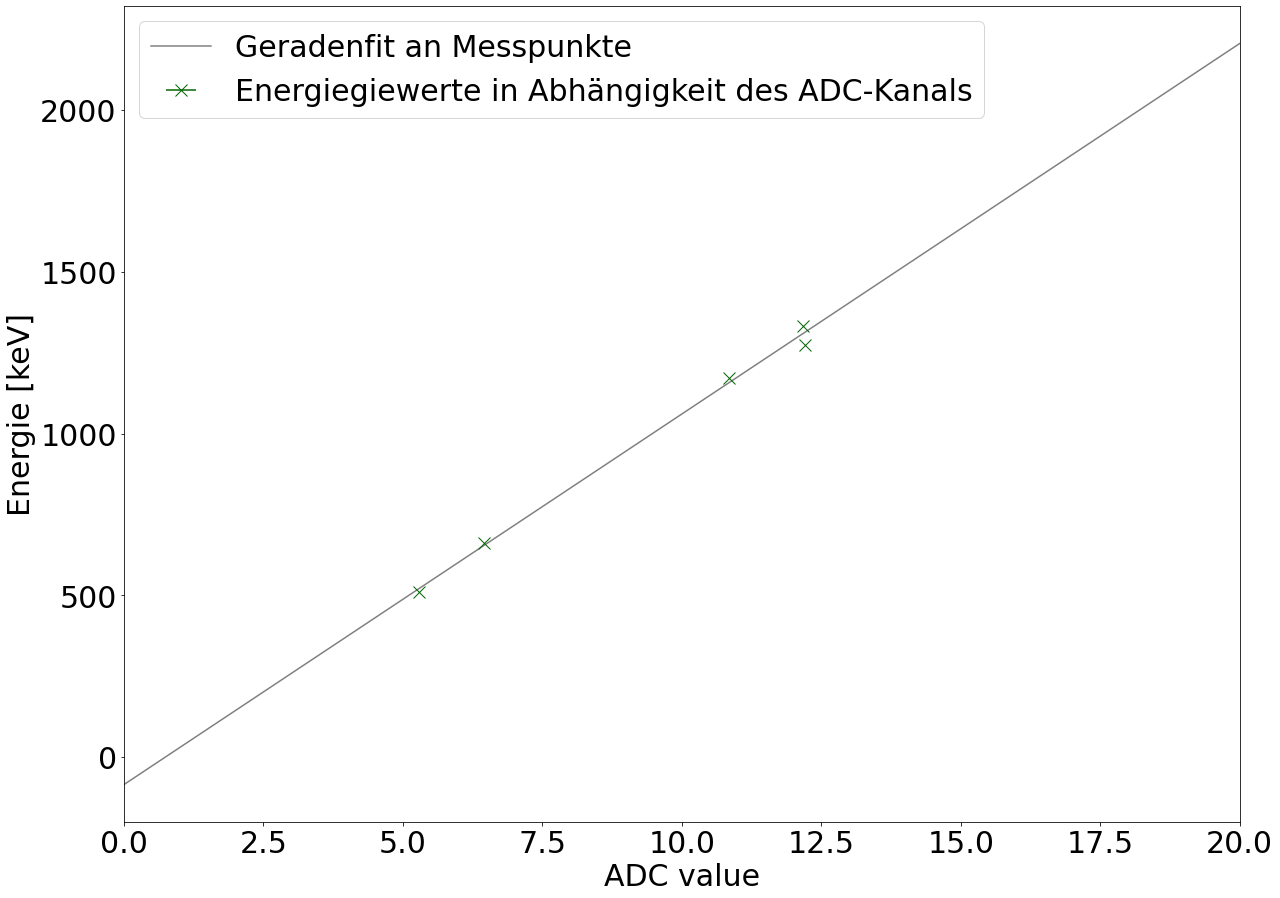

In [365]:
#Energiekalibration
parameters = {'xtick.labelsize': 30, 'ytick.labelsize': 30}
plt.rcParams.update(parameters)

#Energyspectrum open LG
fig, ax = plt.subplots(figsize=(20,15))
ax.set_xlim(0, 20)

#Name for axis
ax.set_xlabel('ADC value', fontsize=30)
ax.set_ylabel('Energie [keV]', fontsize=30)

#Plotten der unskalierten Kurven
# linear_model=np.polyfit(energy_calibration_x,energy_calibration_y,1)
# linear_model_fn=np.poly1d(linear_model)
# x_s=np.arange(30,230)

print(energy_calibration_x)
params, cov = curve_fit(line,energy_calibration_y, energy_calibration_x)
x_fit = np.linspace(0,20)
ax.errorbar(energy_calibration_y, energy_calibration_x, xerr=energy_calibration_y_error,fmt='x',markersize=12, color = "darkgreen",label = "Energiegiewerte in Abhängigkeit des ADC-Kanals")
ax.plot(x_fit, line(x_fit, params[0], params[1]), color = "grey", label="Geradenfit an Messpunkte")
print("Steigung:",params[1])
print("Steigung Fehler:", np.sqrt(cov[1,1]))
print("Y-Abschnitt:", params[0])
print("Y-Abschnitt Fehler:",np.sqrt(cov[0,0]))

ax.legend(fontsize=30)
fig.savefig('Kalibrierungsmessung.png', dpi=200)

In [366]:
energy_calibration_y = []
energy_calibration_y_error = []
energy_calibration_y_sigma = []
energy_calibration_x = []

Untergrundgerade: 345.53522474429934 + -71.93598165963199 x
Amplitude A Na 511: 5374.744047652302
Amplitude A Fehler Na 511: 0.43866578801818756
Erwartungswert mu Na 511: 3.218733568009991
Erwartungswert mu Fehler Na 511: 0.000001
Standardabweichung sigma Na 511: 0.011066328538166872
Standardabweichung sigma Fehler Na 511: 0.000001
Kalibrierungsfaktor Na 511: 158.75809202683715
Feher Kalibrierungsfaktor Na 511: 0.003438
Energieauflösung Na 511: 0.008108779260079158
Fehler Energieauflösung Na 511: 0.000001
Anzahl gemessener Events in 3 sigma Intervall:  (297.3768689785894, 3.3015464819506624e-12)
Anzahl gemessener Events aus Analytischem Integral:  298.18189929644564
Anzahl gemessener Events aus Analytischem Integral Fehler:  0.03730868940847144
Untergrundgerade: 117.00951063030722 + -12.712875745117133 x
Amplitude A Na 1275: 2678.2035573923076
Amplitude A Fehler Na 1275: 0.9335290527245164
Erwartungswert mu Na 1275: 7.947420847482755
Erwartungswert mu Fehler Na 1275: 0.000004
Standarda

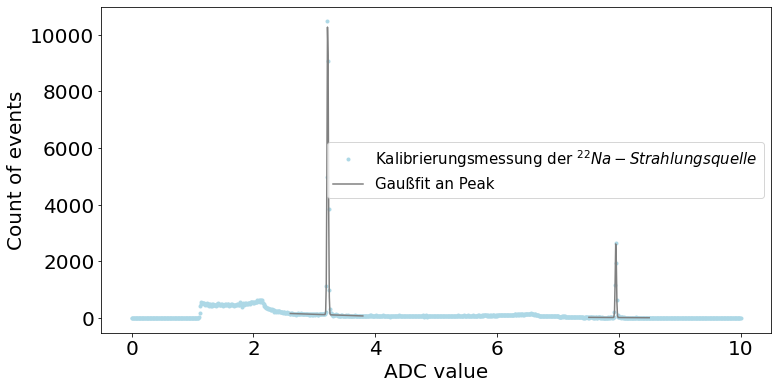

In [367]:
#na-Eichung Gedetektor
adc = ge_adcvalue_naeich
count = ge_counts_naeich


gaussstart = 260
gaussstop = 380
gaussstart2 = 750
gaussstop2 = 850

parameters = {'xtick.labelsize': 20, 'ytick.labelsize': 20}
plt.rcParams.update(parameters)

#Energyspectrum open LG
fig, ax = plt.subplots(figsize=(12,6))

#Name for axis
ax.set_xlabel('ADC value', fontsize=20)
ax.set_ylabel('Count of events', fontsize=20)
#Plotten der unskalierten Kurven
ax.plot(adc, count,'o',markersize=3, color = "lightblue",label = "Kalibrierungsmessung der $^{22}Na-Strahlungsquelle$")
#ax.set_ylim(0,)
# ax.vlines(4,0,400)
# ax.vlines(7,0,400)
# ax.vlines(11,0,400)
# ax.vlines(14,0,400)


#Gauß 511
#ax.vlines(3.216,0,12000)
startparameter = 300, -50, 10000, 3.216,0.002
a, b, A, x0, sigma, afehler, bfehler, Afehler, x0fehler, sigmafehler = lin_gauss_fit(adc[gaussstart:gaussstop] , count[gaussstart:gaussstop],startparameter)
#print(a, b, A, x0, sigma)
#print('MW:',round(x,3), 'pm', np.sqrt(fehlermü), 'SD:', round(sigma,3), 'pm', np.sqrt(fehlersd))
FWHM = round(2.35482 * sigma,4)
#print('FWHM:',FWHM11)
#ax.vlines(3.26,0,5000)
#ax.vlines(gaussstop,0,5000)

ax.plot(adc[gaussstart:gaussstop], lin_gauss(adc[gaussstart:gaussstop], a, b,A,x0,sigma), color = "grey")
photopeak = 511
calibrationfactor = photopeak / x0 
calibrationfactorfehler = sigma/x0
print("Untergrundgerade:",a,"+",b,"x")
print("Amplitude A Na 511:",A/2)
print("Amplitude A Fehler Na 511:",Afehler/2)
print("Erwartungswert mu Na 511:",x0)
print("Erwartungswert mu Fehler Na 511:",'{:f}'.format(x0fehler))
print("Standardabweichung sigma Na 511:",sigma)
print("Standardabweichung sigma Fehler Na 511:",'{:f}'.format(sigmafehler))
print("Kalibrierungsfaktor Na 511:",calibrationfactor)
print("Feher Kalibrierungsfaktor Na 511:",'{:f}'.format(calibrationfactorfehler))
print("Energieauflösung Na 511:", FWHM/x0)
energieaufloesungFehler=np.sqrt((2.35482/x0)**2*sigmafehler**2-(2.35482*sigma/(x0**2))*x0fehler**2)
print("Fehler Energieauflösung Na 511:", '{:f}'.format(energieaufloesungFehler))
energy_calibration_y.append(x0)
energy_calibration_y_error.append(x0fehler)
energy_calibration_y_sigma.append(sigma)
energy_calibration_x.append(photopeak)
#Intensity using integral
sigmax3integration = integrate.quad(lambda integrator: gauss(integrator,0, A, x0, sigma),x0-3*sigma,x0+3*sigma)
print("Anzahl gemessener Events in 3 sigma Intervall: ", sigmax3integration)
analiticIntegral = A*sigma*np.sqrt(2*np.pi)
analiticalIntergralFehler = np.sqrt(2*np.pi)*np.sqrt((sigma*Afehler)**2+(A*sigmafehler)**2)
print("Anzahl gemessener Events aus Analytischem Integral: ", analiticIntegral)
print("Anzahl gemessener Events aus Analytischem Integral Fehler: ", analiticalIntergralFehler)


#Gauß 1275
#ax.vlines(7.95,0,10000)
startparameter = 120, -10, 2000, 7.95, 0.01
#ax.plot(adc[gaussstart:gaussstop] , count[gaussstart:gaussstop], color = "grey", label="Gaußfit an Kalibrierungsmessung")
a, b, A1, x01, sigma1,afehler, bfehler, Afehler1, x0fehler1, sigmafehler1= lin_gauss_fit(adc[gaussstart2:gaussstop2] , count[gaussstart2:gaussstop2],startparameter)
FWHM1 = round(2.35482 * sigma,4)
#ax.vlines(gaussstart,0,5000)
#ax.vlines(gaussstop,0,5000)
ax.plot(adc[gaussstart2:gaussstop2], lin_gauss(adc[gaussstart2:gaussstop2], a, b,A1, x01, sigma1), color = "grey", label="Gaußfit an Peak")

na_photopeak1 = 1275
calibrationfactor1 = na_photopeak1 / x01
calibrationfactorfehler1 = sigmafehler1/x01
print("Untergrundgerade:",a,"+",b,"x")
print("Amplitude A Na 1275:",A1)
print("Amplitude A Fehler Na 1275:",Afehler1)
print("Erwartungswert mu Na 1275:",x01)
print("Erwartungswert mu Fehler Na 1275:",'{:f}'.format(x0fehler1))
print("Standardabweichung sigma Na 1275:",sigma1)
print("Standardabweichung sigma Fehler Na 1275:",'{:f}'.format(sigmafehler1))
print("Kalibrierungsfaktor Na 1275:",calibrationfactor1)
print("Feher Kalibrierungsfaktor Na 1275:",'{:f}'.format(calibrationfactorfehler1))
print("Energieauflösung Na 1275:", FWHM1/x01)
energieaufloesungFehler=np.sqrt((2.35482/x01)**2*sigmafehler1**2-(2.35482*sigma1/(x01**2))*x0fehler1**2)
print("Fehler Energieauflösung Na 1275:", '{:f}'.format(energieaufloesungFehler))
energy_calibration_y.append(x01)
energy_calibration_y_error.append(x0fehler1)
energy_calibration_y_sigma.append(sigma1)
energy_calibration_x.append(na_photopeak1)
#Intensity using integral
sigmax3integration = integrate.quad(lambda integrator: gauss(integrator,0, A1, x01, sigma1),x01-3*sigma1,x01+3*sigma1)
print("Anzahl gemessener Events in 3 sigma Intervall: ", sigmax3integration)

#Intensity using integral
analiticIntegral = A1*sigma1*np.sqrt(2*np.pi)
analiticalIntergralFehler = np.sqrt(2*np.pi)*np.sqrt((sigma1*Afehler1)**2+(A1*sigmafehler1)**2)
print("Anzahl gemessener Events aus Analytischem Integral: ", analiticIntegral)
print("Anzahl gemessener Events aus Analytischem Integral Fehler: ", analiticalIntergralFehler)

ax.legend(fontsize=15)
fig.savefig('Kalibrierungsmessung.png', dpi=200)

Amplitude A Co 1173: 2290.6287485153634
Amplitude A Fehler Co 1173: 0.964932
Erwartungswert mu Co 1173: 7.32045491632437
Erwartungswert mu Fehler Co 1173: 0.000004
Standardabweichung sigma Co 1173: 0.009319775105137902
Standardabweichung sigma Fehler Co 1173: 0.000005
Kalibrierungsfaktor Co 1173: 158.75809202683715
Feher Kalibrierungsfaktor Co 1173: 0.003438
Energieauflösung Co 1173: 0.0029916173585283245
Fehler Energieauflösung Co 1173: 0.000001
Anzahl gemessener Events aus Analytischem Integral:  53.51186333031751
Anzahl gemessener Events aus Analytischem Integral Fehler:  0.03481774374685193
Amplitude A Co 1333: 1886.0316776003938
Amplitude A Fehler Co 1333: 0.933920
Erwartungswert mu Co 1333: 8.304992286308936
Erwartungswert mu Fehler Co 1333: 0.000006
Standardabweichung sigma Co 1333: 0.009627308506740815
Standardabweichung sigma Fehler Co 1333: 0.000005
Kalibrierungsfaktor Co 1333: 160.50586852410402
Feher Kalibrierungsfaktor Co 1333: 0.000001
Energieauflösung Co 1333: 0.00273329

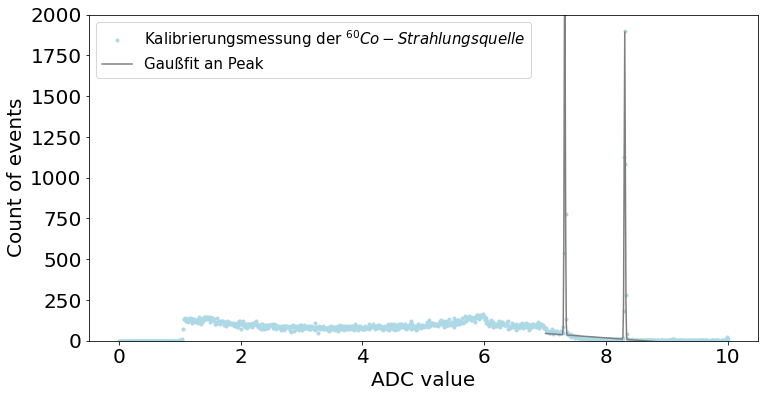

In [368]:
#co-Eichung Gedetektor
adc = ge_adcvalue_coeich
count = ge_counts_coeich

gaussstart = 700
gaussstop = 900

parameters = {'xtick.labelsize': 20, 'ytick.labelsize': 20}
plt.rcParams.update(parameters)

#Energyspectrum open LG
fig, ax = plt.subplots(figsize=(12,6))

#Name for axis
ax.set_xlabel('ADC value', fontsize=20)
ax.set_ylabel('Count of events', fontsize=20)
#Plotten der unskalierten Kurven
ax.plot(adc, count,'o',markersize=3, color = "lightblue",label = "Kalibrierungsmessung der $^{60}Co-Strahlungsquelle$")


#Gauß 1.173
startparameter = 200,-1, 2000, 7.32, 0.01,1800, 8.32, 0.01
#ax.plot(adc[gaussstart:gaussstop] , count[gaussstart:gaussstop], color = "grey", label="Gaußfit an Kalibrierungsmessung")
a, b, A1, x01, sigma1, A2, x02, sigma2,afehler, bfehler, Afehler1, x0fehler1, sigmafehler1, Afehler2, x0fehler2, sigmafehler2 = lin_double_gauss_fit(adc[gaussstart:gaussstop] , count[gaussstart:gaussstop],startparameter)
FWHM1 = round(2.35482 * sigma1,4)
FWHM2 = round(2.35482 * sigma2,4)
# ax.vlines(7.32,0,5000)
# ax.vlines(8.32,0,5000)
ax.plot(adc[gaussstart:gaussstop], lin_double_gauss(adc[gaussstart:gaussstop], a, b,A1, x01, sigma1, A2, x02, sigma2), color = "grey", label="Gaußfit an Peak")

#Co-1173
photopeak1 = 1173
calibrationfactor1 = photopeak1 / x01 
calibrationfactorfehler1 = sigmafehler1/x01
print("Amplitude A Co 1173:",A1)
print("Amplitude A Fehler Co 1173:",'{:f}'.format(Afehler1))
print("Erwartungswert mu Co 1173:",x01)
print("Erwartungswert mu Fehler Co 1173:",'{:f}'.format(x0fehler1))
print("Standardabweichung sigma Co 1173:",sigma1)
print("Standardabweichung sigma Fehler Co 1173:",'{:f}'.format(sigmafehler1))
print("Kalibrierungsfaktor Co 1173:",calibrationfactor)
print("Feher Kalibrierungsfaktor Co 1173:",'{:f}'.format(calibrationfactorfehler))
print("Energieauflösung Co 1173:", FWHM1/x01)
energieaufloesungFehler=np.sqrt((2.35482/x01)**2*sigmafehler1**2-(2.35482*sigma1/(x01**2))*x0fehler1**2)
print("Fehler Energieauflösung Co 1173:", '{:f}'.format(energieaufloesungFehler))
energy_calibration_y.append(x01)
energy_calibration_y_error.append(x0fehler1)
energy_calibration_y_sigma.append(sigma1)
energy_calibration_x.append(photopeak1)
#Intensity using integral
sigmax3integration = integrate.quad(lambda integrator: gauss(integrator,0, A1, x01, sigma1),x01-3*sigma1,x01+3*sigma1)
analiticIntegral = A1*sigma1*np.sqrt(2*np.pi)
analiticalIntergralFehler = np.sqrt(2*np.pi)*np.sqrt((sigma1*Afehler1)**2+(A1*sigmafehler1)**2)
print("Anzahl gemessener Events aus Analytischem Integral: ", analiticIntegral)
print("Anzahl gemessener Events aus Analytischem Integral Fehler: ", analiticalIntergralFehler)

#Co-1333
photopeak2 = 1333
calibrationfactor2 = photopeak2 / x02
calibrationfactorfehler2 = sigmafehler2/x02
print("Amplitude A Co 1333:",A2)
print("Amplitude A Fehler Co 1333:",'{:f}'.format(Afehler2))
print("Erwartungswert mu Co 1333:",x02)
print("Erwartungswert mu Fehler Co 1333:",'{:f}'.format(x0fehler2))
print("Standardabweichung sigma Co 1333:",sigma2)
print("Standardabweichung sigma Fehler Co 1333:",'{:f}'.format(sigmafehler2))
print("Kalibrierungsfaktor Co 1333:",calibrationfactor2)
print("Feher Kalibrierungsfaktor Co 1333:",'{:f}'.format(calibrationfactorfehler2))
print("Energieauflösung Co 1333:", FWHM2/x02)
energieaufloesungFehler=np.sqrt((2.35482/x02)**2*sigmafehler2**2-(2.35482*sigma2/(x02**2))*x0fehler2**2)
print("Fehler Energieauflösung Co 1333:", '{:f}'.format(energieaufloesungFehler))
energy_calibration_y.append(x02)
energy_calibration_y_error.append(x0fehler2)
energy_calibration_y_sigma.append(sigma2)
energy_calibration_x.append(photopeak2)
#Intensity using integral
sigmax3integration = integrate.quad(lambda integrator: gauss(integrator,0, A2, x02, sigma2),x02-3*sigma2,x02+3*sigma2)
print("Anzahl gemessener Events in 3 sigma Intervall: ", sigmax3integration)
analiticIntegral = A2*sigma2*np.sqrt(2*np.pi)
analiticalIntergralFehler = np.sqrt(2*np.pi)*np.sqrt((sigma2*Afehler2)**2+(A2*sigmafehler2)**2)
print("Anzahl gemessener Events aus Analytischem Integral: ", analiticIntegral)
print("Anzahl gemessener Events aus Analytischem Integral Fehler: ", analiticalIntergralFehler)

plt.ylim(0,2000)
ax.legend(fontsize=15)
fig.savefig('Kalibrierungsmessung.png', dpi=200)

264.25611029286074 -54.978262808675325 11172.267781367906 4.152332376640146 0.008796823717424183
Y-Abschnitt Cs 662 264.25611029286074
Steigung Cs 662 -54.978262808675325
Amplitude A Cs 662: 11172.267781367906
Amplitude A Fehler Cs 662: 0.985792
Erwartungswert mu Cs 662: 4.152332376640146
Erwartungswert mu Fehler Cs 662: 0.000001
Standardabweichung sigma Cs 662: 0.008796823717424183
Standardabweichung sigma Fehler Cs 662: 0.000001
Kalibrierungsfaktor Cs 662: 159.42847054446455
Feher Kalibrierungsfaktor Cs 662: 0.000000
Energieauflösung Cs 662: 0.004985150060831444
Fehler Energieauflösung Cs 662: 0.000001
Anzahl gemessener Events aus Analytischem Integral:  246.3526054387047
Anzahl gemessener Events aus Analytischem Integral Fehler:  0.03336444899327992
Anzahl gemessener Events in 3 sigma Intervall:  (245.68750364437824, 2.7276792207309858e-12)
Comptonadc und -energie:  0.675 107.61421761751357


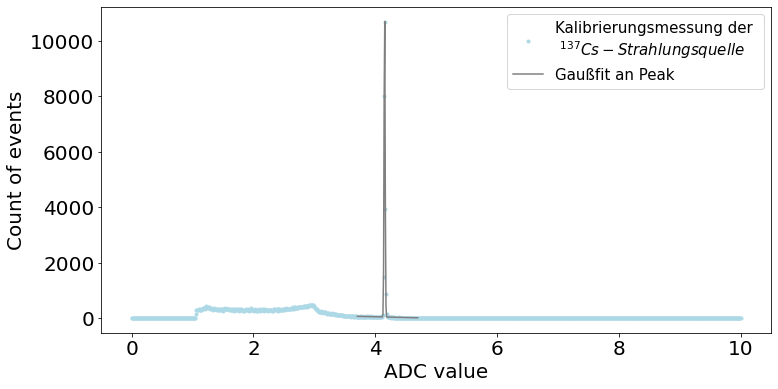

In [369]:
#cs-Eichung Halbleiterdetektor
adc = ge_adcvalue_cseich
count = ge_counts_cseich

gaussstart = 370
gaussstop = 470

parameters = {'xtick.labelsize': 20, 'ytick.labelsize': 20}
plt.rcParams.update(parameters)

#Energyspectrum open LG
fig, ax = plt.subplots(figsize=(12,6))

#Name for axis
ax.set_xlabel('ADC value', fontsize=20)
ax.set_ylabel('Count of events', fontsize=20)
#Plotten der unskalierten Kurven
ax.plot(adc, count,'o',markersize=3, color = "lightblue",label = "Kalibrierungsmessung der \n $^{137}Cs-Strahlungsquelle$")

#Gauß 662
#H, A, x, sigma, Afehler, fehlermü, fehlersd = gauss_fit(adc[gaussstart:gaussstop] , count[gaussstart:gaussstop])

#ax.vlines(4.15,0,12000)
startparameter = 600, -200, 10000, 4.152, 0.01
#startparameter = 5000,-1, 15000, 100, 20
#ax.plot(adc[gaussstart:gaussstop] , count[gaussstart:gaussstop], color = "grey", label="Gaußfit an Kalibrierungsmessung")
a, b, A, x0, sigma, afehler, bfehler, Afehler, x0fehler, sigmafehler = lin_gauss_fit(adc[gaussstart:gaussstop] , count[gaussstart:gaussstop],startparameter)
print(a, b, A, x0, sigma)
#print('MW:',round(x,3), 'pm', np.sqrt(fehlermü), 'SD:', round(sigma,3), 'pm', np.sqrt(fehlersd))
FWHM = round(2.35482 * sigma,4)
#print('FWHM:',FWHM11)

#ax.vlines(gaussstop,0,5000)

ax.plot(adc[gaussstart:gaussstop], lin_gauss(adc[gaussstart:gaussstop], a, b,A,x0,sigma), color = "grey", label="Gaußfit an Peak")
photopeak = 662
calibrationfactor = photopeak / x0 
calibrationfactorfehler = sigmafehler/x0
print("Y-Abschnitt Cs 662", a)
print("Steigung Cs 662", b)
print("Amplitude A Cs 662:",A)
print("Amplitude A Fehler Cs 662:",'{:f}'.format(Afehler))
print("Erwartungswert mu Cs 662:",x0)
print("Erwartungswert mu Fehler Cs 662:",'{:f}'.format(x0fehler))
print("Standardabweichung sigma Cs 662:",sigma)
print("Standardabweichung sigma Fehler Cs 662:",'{:f}'.format(sigmafehler))
print("Kalibrierungsfaktor Cs 662:",calibrationfactor)
print("Feher Kalibrierungsfaktor Cs 662:",'{:f}'.format(calibrationfactorfehler))
print("Energieauflösung Cs 662:", FWHM/x0)
energieaufloesungFehler=np.sqrt((2.35482/x0)**2*sigmafehler**2-(2.35482*sigma/(x0**2))*x0fehler**2)
print("Fehler Energieauflösung Cs 662:", '{:f}'.format(energieaufloesungFehler))
energy_calibration_y.append(x0)
energy_calibration_y_error.append(x0fehler)
energy_calibration_y_sigma.append(sigma)
energy_calibration_x.append(photopeak)
#Intensity using integral
sigmax3integration = integrate.quad(lambda integrator: gauss(integrator,0, A, x0, sigma),x0-3*sigma,x0+3*sigma)
analiticIntegral = A*sigma*np.sqrt(2*np.pi)
analiticalIntergralFehler = np.sqrt(2*np.pi)*np.sqrt((sigma*Afehler)**2+(A*sigmafehler)**2)
print("Anzahl gemessener Events aus Analytischem Integral: ", analiticIntegral)
print("Anzahl gemessener Events aus Analytischem Integral Fehler: ", analiticalIntergralFehler)

print("Anzahl gemessener Events in 3 sigma Intervall: ", sigmax3integration)
print("Comptonadc und -energie: ", adc[67], calibrationfactor*adc[67])

ax.legend(fontsize=15)
fig.savefig('Kalibrierungsmessung.png', dpi=200)

Steigung: 161.53767076535723
Steigung Fehler: 0.09030020582886197
Y-Abschnitt: -8.922204418233465
Y-Abschnitt Fehler: 0.5898274702973239


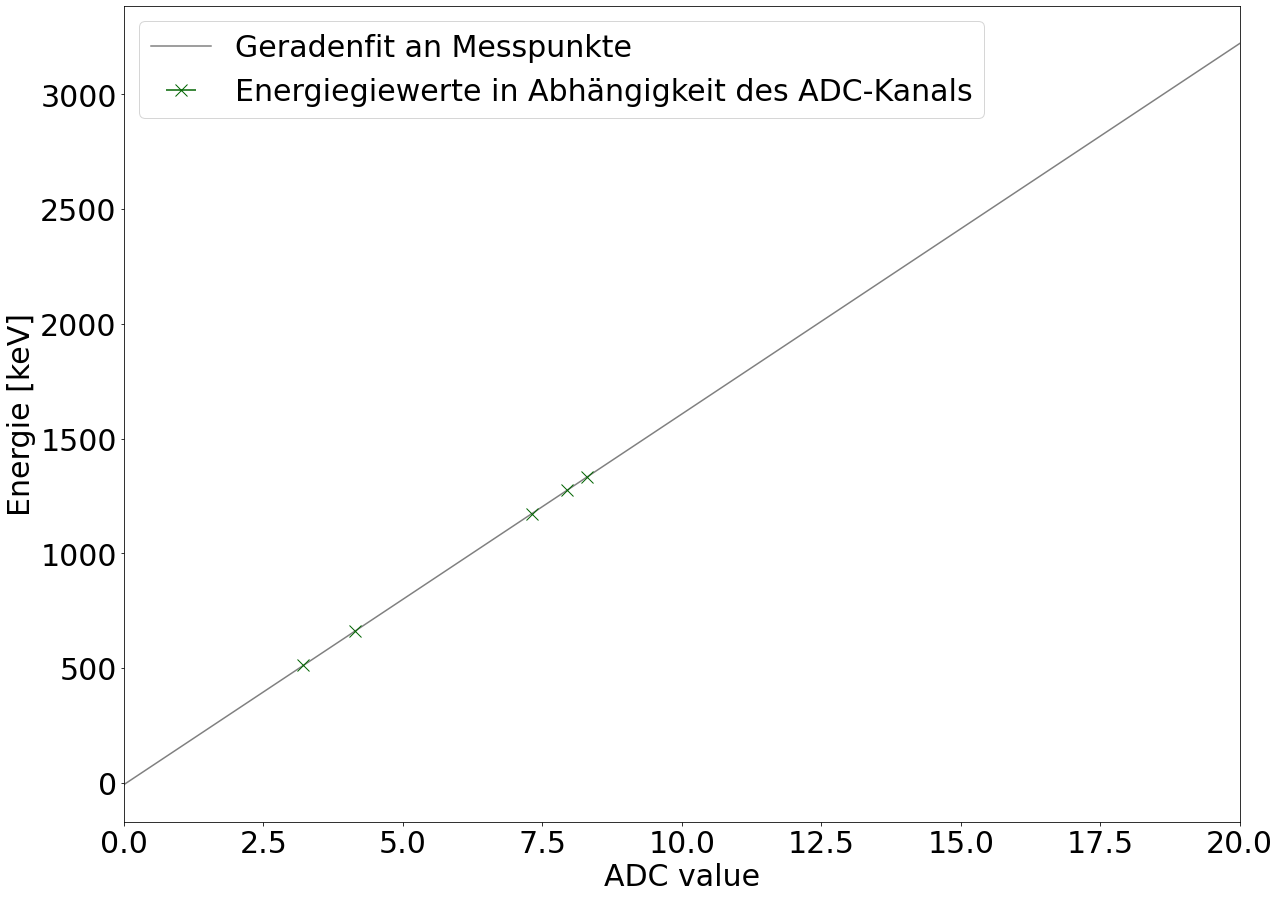

In [370]:
#Energiekalibration
parameters = {'xtick.labelsize': 30, 'ytick.labelsize': 30}
plt.rcParams.update(parameters)

#Energyspectrum open LG
fig, ax = plt.subplots(figsize=(20,15))
ax.set_xlim(0, 20)

#Name for axis
ax.set_xlabel('ADC value', fontsize=30)
ax.set_ylabel('Energie [keV]', fontsize=30)

#Plotten der unskalierten Kurven
# linear_model=np.polyfit(energy_calibration_x,energy_calibration_y,1)
# linear_model_fn=np.poly1d(linear_model)
# x_s=np.arange(30,230)

params, cov = curve_fit(line,energy_calibration_y, energy_calibration_x)
x_fit = np.linspace(0,20)
ax.errorbar(energy_calibration_y, energy_calibration_x, xerr=energy_calibration_y_error,fmt='x',markersize=12, color = "darkgreen",label = "Energiegiewerte in Abhängigkeit des ADC-Kanals")
ax.plot(x_fit, line(x_fit, params[0], params[1]), color = "grey", label="Geradenfit an Messpunkte")
print("Steigung:",params[1])
print("Steigung Fehler:", np.sqrt(cov[1,1]))
print("Y-Abschnitt:", params[0])
print("Y-Abschnitt Fehler:",np.sqrt(cov[0,0]))

ax.legend(fontsize=30)
fig.savefig('Kalibrierungsmessung.png', dpi=200)

98.74957886327279 -12.909419618729082 600.3243903625931 6.355375383441782 0.20445040663212943
Y-Abschnitt Cs 662 98.74957886327279
Steigung Cs 662 -12.909419618729082
Amplitude A Cs 662: 600.3243903625931
Amplitude A Fehler Cs 662: 0.210063
Erwartungswert mu Cs 662: 6.355375383441782
Erwartungswert mu Fehler Cs 662: 0.000081
Standardabweichung sigma Cs 662: 0.20445040663212943
Standardabweichung sigma Fehler Cs 662: 0.000088
Kalibrierungsfaktor Cs 662: 104.16379207509391
Feher Kalibrierungsfaktor Cs 662: 0.000014
Energieauflösung Cs 662: 0.07574690257545348
Fehler Energieauflösung Cs 662: 0.000031
Anzahl gemessener Events aus Analytischem Integral:  307.6549459669068
Anzahl gemessener Events aus Analytischem Integral Fehler:  0.1701645981760036
Anzahl gemessener Events in 3 sigma Intervall:  (306.8243403549434, 3.4064344769414723e-12)
Comptonadc und -energie:  0.675 70.31055965068839


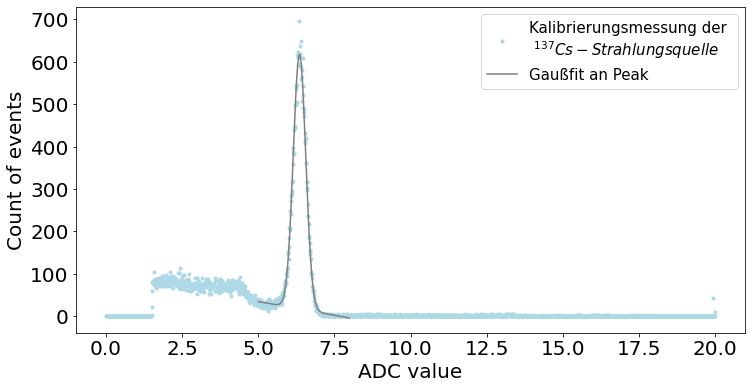

In [371]:
#cs-Eichung Szintialltionsdetektor
adc = Kollimator_adcvalue_cs
count = Kollimator_counts_cs

gaussstart = 500
gaussstop = 800

parameters = {'xtick.labelsize': 20, 'ytick.labelsize': 20}
plt.rcParams.update(parameters)

#Energyspectrum open LG
fig, ax = plt.subplots(figsize=(12,6))

#Name for axis
ax.set_xlabel('ADC value', fontsize=20)
ax.set_ylabel('Count of events', fontsize=20)
#Plotten der unskalierten Kurven
ax.plot(adc, count,'o',markersize=3, color = "lightblue",label = "Kalibrierungsmessung der \n $^{137}Cs-Strahlungsquelle$")

#Gauß 662
#H, A, x, sigma, Afehler, fehlermü, fehlersd = gauss_fit(adc[gaussstart:gaussstop] , count[gaussstart:gaussstop])

startparameter = 200, -5, 1200, 7.0, 0.5
#startparameter = 5000,-1, 15000, 100, 20
#ax.plot(adc[gaussstart:gaussstop] , count[gaussstart:gaussstop], color = "grey", label="Gaußfit an Kalibrierungsmessung")
a, b, A, x0, sigma, afehler, bfehler, Afehler, x0fehler, sigmafehler = lin_gauss_fit(adc[gaussstart:gaussstop] , count[gaussstart:gaussstop],startparameter)
print(a, b, A, x0, sigma)
#print('MW:',round(x,3), 'pm', np.sqrt(fehlermü), 'SD:', round(sigma,3), 'pm', np.sqrt(fehlersd))
FWHM = round(2.35482 * sigma,4)
#print('FWHM:',FWHM11)
#ax.vlines(gaussstart,0,5000)
#ax.vlines(gaussstop,0,5000)

ax.plot(adc[gaussstart:gaussstop], lin_gauss(adc[gaussstart:gaussstop], a, b,A,x0,sigma), color = "grey", label="Gaußfit an Peak")
photopeak = 662
calibrationfactor = photopeak / x0 
calibrationfactorfehler = sigmafehler/x0
print("Y-Abschnitt Cs 662", a)
print("Steigung Cs 662", b)
print("Amplitude A Cs 662:",A)
print("Amplitude A Fehler Cs 662:",'{:f}'.format(Afehler))
print("Erwartungswert mu Cs 662:",x0)
print("Erwartungswert mu Fehler Cs 662:",'{:f}'.format(x0fehler))
print("Standardabweichung sigma Cs 662:",sigma)
print("Standardabweichung sigma Fehler Cs 662:",'{:f}'.format(sigmafehler))
print("Kalibrierungsfaktor Cs 662:",calibrationfactor)
print("Feher Kalibrierungsfaktor Cs 662:",'{:f}'.format(calibrationfactorfehler))
print("Energieauflösung Cs 662:", FWHM/x0)
energieaufloesungFehler=np.sqrt((2.35482/x0)**2*sigmafehler**2-(2.35482*sigma/(x0**2))*x0fehler**2)
print("Fehler Energieauflösung Cs 662:", '{:f}'.format(energieaufloesungFehler))
energy_calibration_y.append(x0)
energy_calibration_y_error.append(x0fehler)
energy_calibration_y_sigma.append(sigma)
energy_calibration_x.append(photopeak)
#Intensity using integral
sigmax3integration = integrate.quad(lambda integrator: gauss(integrator,0, A, x0, sigma),x0-3*sigma,x0+3*sigma)
analiticIntegral = A*sigma*np.sqrt(2*np.pi)
analiticalIntergralFehler = np.sqrt(2*np.pi)*np.sqrt((sigma*Afehler)**2+(A*sigmafehler)**2)
print("Anzahl gemessener Events aus Analytischem Integral: ", analiticIntegral)
print("Anzahl gemessener Events aus Analytischem Integral Fehler: ", analiticalIntergralFehler)

print("Anzahl gemessener Events in 3 sigma Intervall: ", sigmax3integration)
print("Comptonadc und -energie: ", adc[67], calibrationfactor*adc[67])

ax.legend(fontsize=15)
fig.savefig('Kalibrierungsmessung.png', dpi=200)

Amplitude A Co 1173: 88.86271094948086
Amplitude A Fehler Co 1173: 0.190165
Erwartungswert mu Co 1173: 10.72180644883264
Erwartungswert mu Fehler Co 1173: 0.000609
Standardabweichung sigma Co 1173: 0.25518134124662856
Standardabweichung sigma Fehler Co 1173: 0.000664
Kalibrierungsfaktor Co 1173: 104.16379207509391
Feher Kalibrierungsfaktor Co 1173: 0.000014
Energieauflösung Co 1173: 0.05604466027881191
Fehler Energieauflösung Co 1173: 0.000139
Anzahl gemessener Events aus Analytischem Integral:  56.840567873834594
Anzahl gemessener Events aus Analytischem Integral Fehler:  0.19152784908003934
Amplitude A Co 1333: 75.67052456540483
Amplitude A Fehler Co 1333: 0.186045
Erwartungswert mu Co 1333: 12.036230634414803
Erwartungswert mu Fehler Co 1333: 0.000728
Standardabweichung sigma Co 1333: 0.26464192407771997
Standardabweichung sigma Fehler Co 1333: 0.000786
Kalibrierungsfaktor Co 1333: 110.74895791615994
Feher Kalibrierungsfaktor Co 1333: 0.000065
Energieauflösung Co 1333: 0.05177700718

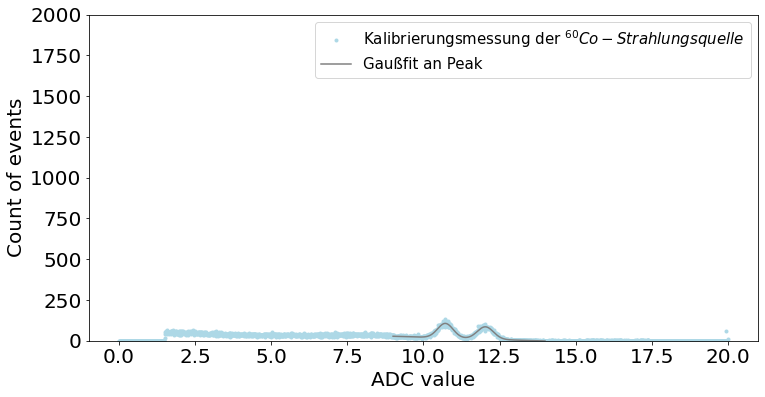

In [372]:
#co-Eichung Kollimator 
adc = Kollimator_adcvalue_co
count = Kollimator_counts_co

gaussstart = 900
gaussstop = 1400

parameters = {'xtick.labelsize': 20, 'ytick.labelsize': 20}
plt.rcParams.update(parameters)

#Energyspectrum open LG
fig, ax = plt.subplots(figsize=(12,6))

#Name for axis
ax.set_xlabel('ADC value', fontsize=20)
ax.set_ylabel('Count of events', fontsize=20)
#Plotten der unskalierten Kurven
ax.plot(adc, count,'o',markersize=3, color = "lightblue",label = "Kalibrierungsmessung der $^{60}Co-Strahlungsquelle$")


#Gauß 1.173
startparameter = 250,-1, 250, 10.7, 0.5,250, 12.0, 0.5
#ax.plot(adc[gaussstart:gaussstop] , count[gaussstart:gaussstop], color = "grey", label="Gaußfit an Kalibrierungsmessung")
a, b, A1, x01, sigma1, A2, x02, sigma2,afehler, bfehler, Afehler1, x0fehler1, sigmafehler1, Afehler2, x0fehler2, sigmafehler2 = lin_double_gauss_fit(adc[gaussstart:gaussstop] , count[gaussstart:gaussstop],startparameter)
FWHM1 = round(2.35482 * sigma1,4)
FWHM2 = round(2.35482 * sigma2,4)
#ax.vlines(11.0,0,5000)
#ax.vlines(12.0,0,5000)
ax.plot(adc[gaussstart:gaussstop], lin_double_gauss(adc[gaussstart:gaussstop], a, b,A1, x01, sigma1, A2, x02, sigma2), color = "grey", label="Gaußfit an Peak")

#Co-1173
photopeak1 = 1173
calibrationfactor1 = photopeak1 / x01 
calibrationfactorfehler1 = sigmafehler1/x01
print("Amplitude A Co 1173:",A1)
print("Amplitude A Fehler Co 1173:",'{:f}'.format(Afehler1))
print("Erwartungswert mu Co 1173:",x01)
print("Erwartungswert mu Fehler Co 1173:",'{:f}'.format(x0fehler1))
print("Standardabweichung sigma Co 1173:",sigma1)
print("Standardabweichung sigma Fehler Co 1173:",'{:f}'.format(sigmafehler1))
print("Kalibrierungsfaktor Co 1173:",calibrationfactor)
print("Feher Kalibrierungsfaktor Co 1173:",'{:f}'.format(calibrationfactorfehler))
print("Energieauflösung Co 1173:", FWHM1/x01)
energieaufloesungFehler=np.sqrt((2.35482/x01)**2*sigmafehler1**2-(2.35482*sigma1/(x01**2))*x0fehler1**2)
print("Fehler Energieauflösung Co 1173:", '{:f}'.format(energieaufloesungFehler))

energy_calibration_y.append(x01)
energy_calibration_y_error.append(x0fehler1)
energy_calibration_y_sigma.append(sigma1)
energy_calibration_x.append(photopeak1)
#Intensity using integral
sigmax3integration = integrate.quad(lambda integrator: gauss(integrator,0, A1, x01, sigma1),x01-3*sigma1,x01+3*sigma1)
analiticIntegral = A1*sigma1*np.sqrt(2*np.pi)
analiticalIntergralFehler = np.sqrt(2*np.pi)*np.sqrt((sigma1*Afehler1)**2+(A1*sigmafehler1)**2)
print("Anzahl gemessener Events aus Analytischem Integral: ", analiticIntegral)
print("Anzahl gemessener Events aus Analytischem Integral Fehler: ", analiticalIntergralFehler)

#Co-1333
photopeak2 = 1333
calibrationfactor2 = photopeak2 / x02
calibrationfactorfehler2 = sigmafehler2/x02
print("Amplitude A Co 1333:",A2)
print("Amplitude A Fehler Co 1333:",'{:f}'.format(Afehler2))
print("Erwartungswert mu Co 1333:",x02)
print("Erwartungswert mu Fehler Co 1333:",'{:f}'.format(x0fehler2))
print("Standardabweichung sigma Co 1333:",sigma2)
print("Standardabweichung sigma Fehler Co 1333:",'{:f}'.format(sigmafehler2))
print("Kalibrierungsfaktor Co 1333:",calibrationfactor2)
print("Feher Kalibrierungsfaktor Co 1333:",'{:f}'.format(calibrationfactorfehler2))
print("Energieauflösung Co 1333:", FWHM2/x02)
energieaufloesungFehler=np.sqrt((2.35482/x02)**2*sigmafehler2**2-(2.35482*sigma2/(x02**2))*x0fehler2**2)
print("Fehler Energieauflösung Co 1333:", '{:f}'.format(energieaufloesungFehler))
energy_calibration_y.append(x02)
energy_calibration_y_error.append(x0fehler2)
energy_calibration_y_sigma.append(sigma2)
energy_calibration_x.append(photopeak2)
#Intensity using integral
sigmax3integration = integrate.quad(lambda integrator: gauss(integrator,0, A2, x02, sigma2),x02-3*sigma2,x02+3*sigma2)
print("Anzahl gemessener Events in 3 sigma Intervall: ", sigmax3integration)
analiticIntegral = A2*sigma2*np.sqrt(2*np.pi)
analiticalIntergralFehler = np.sqrt(2*np.pi)*np.sqrt((sigma2*Afehler2)**2+(A2*sigmafehler2)**2)
print("Anzahl gemessener Events aus Analytischem Integral: ", analiticIntegral)
print("Anzahl gemessener Events aus Analytischem Integral Fehler: ", analiticalIntergralFehler)

plt.ylim(0,2000)
ax.legend(fontsize=15)
fig.savefig('Kalibrierungsmessung.png', dpi=200)

162.25959674670796 -21.246780146608273 825.9598964312787 6.3814811877063375 0.20308569137327048
Y-Abschnitt Cs 662 162.25959674670796
Steigung Cs 662 -21.246780146608273
Amplitude A Cs 662: 825.9598964312787
Amplitude A Fehler Cs 662: 0.210605
Erwartungswert mu Cs 662: 6.3814811877063375
Erwartungswert mu Fehler Cs 662: 0.000059
Standardabweichung sigma Cs 662: 0.20308569137327048
Standardabweichung sigma Fehler Cs 662: 0.000063
Kalibrierungsfaktor Cs 662: 103.73767163575063
Feher Kalibrierungsfaktor Cs 662: 0.000010
Energieauflösung Cs 662: 0.07493558093083981
Fehler Energieauflösung Cs 662: 0.000022
Anzahl gemessener Events aus Analytischem Integral:  420.46342253960484
Anzahl gemessener Events aus Analytischem Integral Fehler:  0.16933330714468556
Anzahl gemessener Events in 3 sigma Intervall:  (419.3282570466869, 4.65547885615189e-12)
Comptonadc und -energie:  0.675 70.02292835413168


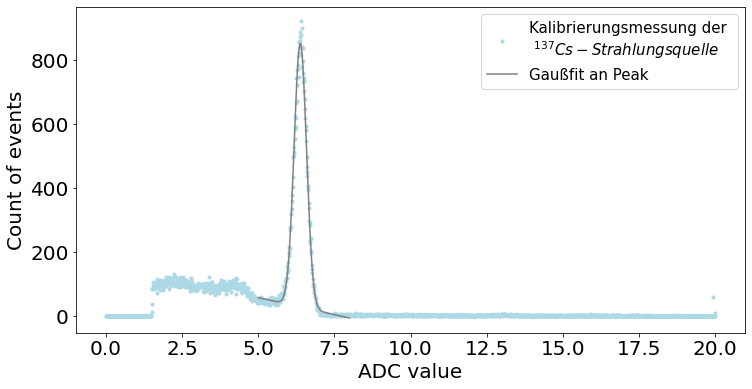

In [373]:
#cs-Eichung Kollimator Mitte
adc = KollimatorMittel_adcvalue_cs
count = KollimatorMitte_counts_cs

gaussstart = 500
gaussstop = 800

parameters = {'xtick.labelsize': 20, 'ytick.labelsize': 20}
plt.rcParams.update(parameters)

#Energyspectrum open LG
fig, ax = plt.subplots(figsize=(12,6))

#Name for axis
ax.set_xlabel('ADC value', fontsize=20)
ax.set_ylabel('Count of events', fontsize=20)
#Plotten der unskalierten Kurven
ax.plot(adc, count,'o',markersize=3, color = "lightblue",label = "Kalibrierungsmessung der \n $^{137}Cs-Strahlungsquelle$")

#Gauß 662
#H, A, x, sigma, Afehler, fehlermü, fehlersd = gauss_fit(adc[gaussstart:gaussstop] , count[gaussstart:gaussstop])

startparameter = 200, -5, 1200, 7.0, 0.5
#startparameter = 5000,-1, 15000, 100, 20
#ax.plot(adc[gaussstart:gaussstop] , count[gaussstart:gaussstop], color = "grey", label="Gaußfit an Kalibrierungsmessung")
a, b, A, x0, sigma, afehler, bfehler, Afehler, x0fehler, sigmafehler = lin_gauss_fit(adc[gaussstart:gaussstop] , count[gaussstart:gaussstop],startparameter)
print(a, b, A, x0, sigma)
#print('MW:',round(x,3), 'pm', np.sqrt(fehlermü), 'SD:', round(sigma,3), 'pm', np.sqrt(fehlersd))
FWHM = round(2.35482 * sigma,4)
#print('FWHM:',FWHM11)
#ax.vlines(gaussstart,0,5000)
#ax.vlines(gaussstop,0,5000)

ax.plot(adc[gaussstart:gaussstop], lin_gauss(adc[gaussstart:gaussstop], a, b,A,x0,sigma), color = "grey", label="Gaußfit an Peak")
photopeak = 662
calibrationfactor = photopeak / x0 
calibrationfactorfehler = sigmafehler/x0
print("Y-Abschnitt Cs 662", a)
print("Steigung Cs 662", b)
print("Amplitude A Cs 662:",A)
print("Amplitude A Fehler Cs 662:",'{:f}'.format(Afehler))
print("Erwartungswert mu Cs 662:",x0)
print("Erwartungswert mu Fehler Cs 662:",'{:f}'.format(x0fehler))
print("Standardabweichung sigma Cs 662:",sigma)
print("Standardabweichung sigma Fehler Cs 662:",'{:f}'.format(sigmafehler))
print("Kalibrierungsfaktor Cs 662:",calibrationfactor)
print("Feher Kalibrierungsfaktor Cs 662:",'{:f}'.format(calibrationfactorfehler))
print("Energieauflösung Cs 662:", FWHM/x0)
energieaufloesungFehler=np.sqrt((2.35482/x0)**2*sigmafehler**2-(2.35482*sigma/(x0**2))*x0fehler**2)
print("Fehler Energieauflösung Cs 662:", '{:f}'.format(energieaufloesungFehler))
energy_calibration_y.append(x0)
energy_calibration_y_error.append(x0fehler)
energy_calibration_y_sigma.append(sigma)
energy_calibration_x.append(photopeak)
#Intensity using integral
sigmax3integration = integrate.quad(lambda integrator: gauss(integrator,0, A, x0, sigma),x0-3*sigma,x0+3*sigma)
analiticIntegral = A*sigma*np.sqrt(2*np.pi)
analiticalIntergralFehler = np.sqrt(2*np.pi)*np.sqrt((sigma*Afehler)**2+(A*sigmafehler)**2)
print("Anzahl gemessener Events aus Analytischem Integral: ", analiticIntegral)
print("Anzahl gemessener Events aus Analytischem Integral Fehler: ", analiticalIntergralFehler)

print("Anzahl gemessener Events in 3 sigma Intervall: ", sigmax3integration)
print("Comptonadc und -energie: ", adc[67], calibrationfactor*adc[67])

ax.legend(fontsize=15)
fig.savefig('Kalibrierungsmessung.png', dpi=200)

146.44104790461677 -19.338451802323373 375.37720932904864 6.319172100323618 0.19828939777648863
Y-Abschnitt Cs 662 146.44104790461677
Steigung Cs 662 -19.338451802323373
Amplitude A Cs 662: 375.37720932904864
Amplitude A Fehler Cs 662: 0.213144
Erwartungswert mu Cs 662: 6.319172100323618
Erwartungswert mu Fehler Cs 662: 0.000128
Standardabweichung sigma Cs 662: 0.19828939777648863
Standardabweichung sigma Fehler Cs 662: 0.000138
Kalibrierungsfaktor Cs 662: 104.76055873934777
Feher Kalibrierungsfaktor Cs 662: 0.000022
Energieauflösung Cs 662: 0.07388626114108984
Fehler Energieauflösung Cs 662: 0.000049
Anzahl gemessener Events aus Analytischem Integral:  186.57666643399637
Anzahl gemessener Events aus Analytischem Integral Fehler:  0.16733422555006555
Anzahl gemessener Events in 3 sigma Intervall:  (186.07294748446162, 2.0658246977205835e-12)
Comptonadc und -energie:  0.675 70.71337714905975


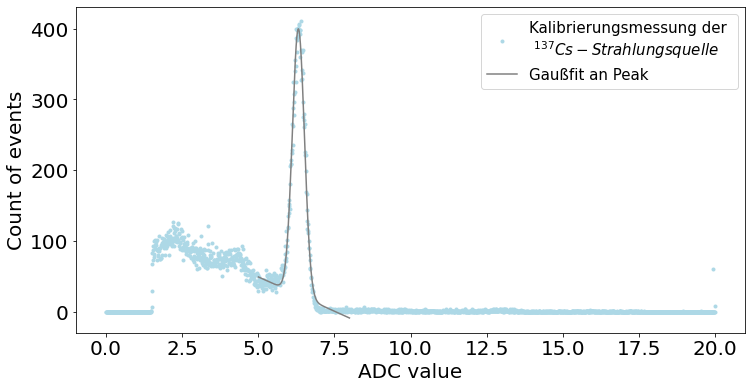

In [374]:
#cs-Eichung Kollimator Rand
adc = KollimatorRand_adcvalue_cs
count = KollimatorRand_counts_cs

gaussstart = 500
gaussstop = 800

parameters = {'xtick.labelsize': 20, 'ytick.labelsize': 20}
plt.rcParams.update(parameters)

#Energyspectrum open LG
fig, ax = plt.subplots(figsize=(12,6))

#Name for axis
ax.set_xlabel('ADC value', fontsize=20)
ax.set_ylabel('Count of events', fontsize=20)
#Plotten der unskalierten Kurven
ax.plot(adc, count,'o',markersize=3, color = "lightblue",label = "Kalibrierungsmessung der \n $^{137}Cs-Strahlungsquelle$")

#Gauß 662
#H, A, x, sigma, Afehler, fehlermü, fehlersd = gauss_fit(adc[gaussstart:gaussstop] , count[gaussstart:gaussstop])

startparameter = 200, -5, 1200, 7.0, 0.5
#startparameter = 5000,-1, 15000, 100, 20
#ax.plot(adc[gaussstart:gaussstop] , count[gaussstart:gaussstop], color = "grey", label="Gaußfit an Kalibrierungsmessung")
a, b, A, x0, sigma, afehler, bfehler, Afehler, x0fehler, sigmafehler = lin_gauss_fit(adc[gaussstart:gaussstop] , count[gaussstart:gaussstop],startparameter)
print(a, b, A, x0, sigma)
#print('MW:',round(x,3), 'pm', np.sqrt(fehlermü), 'SD:', round(sigma,3), 'pm', np.sqrt(fehlersd))
FWHM = round(2.35482 * sigma,4)
#print('FWHM:',FWHM11)
#ax.vlines(gaussstart,0,5000)
#ax.vlines(gaussstop,0,5000)

ax.plot(adc[gaussstart:gaussstop], lin_gauss(adc[gaussstart:gaussstop], a, b,A,x0,sigma), color = "grey", label="Gaußfit an Peak")
photopeak = 662
calibrationfactor = photopeak / x0 
calibrationfactorfehler = sigmafehler/x0
print("Y-Abschnitt Cs 662", a)
print("Steigung Cs 662", b)
print("Amplitude A Cs 662:",A)
print("Amplitude A Fehler Cs 662:",'{:f}'.format(Afehler))
print("Erwartungswert mu Cs 662:",x0)
print("Erwartungswert mu Fehler Cs 662:",'{:f}'.format(x0fehler))
print("Standardabweichung sigma Cs 662:",sigma)
print("Standardabweichung sigma Fehler Cs 662:",'{:f}'.format(sigmafehler))
print("Kalibrierungsfaktor Cs 662:",calibrationfactor)
print("Feher Kalibrierungsfaktor Cs 662:",'{:f}'.format(calibrationfactorfehler))
print("Energieauflösung Cs 662:", FWHM/x0)
energieaufloesungFehler=np.sqrt((2.35482/x0)**2*sigmafehler**2-(2.35482*sigma/(x0**2))*x0fehler**2)
print("Fehler Energieauflösung Cs 662:", '{:f}'.format(energieaufloesungFehler))
energy_calibration_y.append(x0)
energy_calibration_y_error.append(x0fehler)
energy_calibration_y_sigma.append(sigma)
energy_calibration_x.append(photopeak)
#Intensity using integral
sigmax3integration = integrate.quad(lambda integrator: gauss(integrator,0, A, x0, sigma),x0-3*sigma,x0+3*sigma)
analiticIntegral = A*sigma*np.sqrt(2*np.pi)
analiticalIntergralFehler = np.sqrt(2*np.pi)*np.sqrt((sigma*Afehler)**2+(A*sigmafehler)**2)
print("Anzahl gemessener Events aus Analytischem Integral: ", analiticIntegral)
print("Anzahl gemessener Events aus Analytischem Integral Fehler: ", analiticalIntergralFehler)

print("Anzahl gemessener Events in 3 sigma Intervall: ", sigmax3integration)
print("Comptonadc und -energie: ", adc[67], calibrationfactor*adc[67])

ax.legend(fontsize=15)
fig.savefig('Kalibrierungsmessung.png', dpi=200)

190.99073860094992 -41.40342507237858 5171.539449522182 4.15235917972012 0.008500546131460786
Y-Abschnitt Cs 662 190.99073860094992
Steigung Cs 662 -41.40342507237858
Amplitude A Cs 662: 5171.539449522182
Amplitude A Fehler Cs 662: 1.003508
Erwartungswert mu Cs 662: 4.15235917972012
Erwartungswert mu Fehler Cs 662: 0.000002
Standardabweichung sigma Cs 662: 0.008500546131460786
Standardabweichung sigma Fehler Cs 662: 0.000002
Kalibrierungsfaktor Cs 662: 159.42744144898865
Feher Kalibrierungsfaktor Cs 662: 0.000000
Energieauflösung Cs 662: 0.0048165390165857596
Fehler Energieauflösung Cs 662: 0.000001
Anzahl gemessener Events aus Analytischem Integral:  110.19365913559548
Anzahl gemessener Events aus Analytischem Integral Fehler:  0.032831889028456324
Anzahl gemessener Events in 3 sigma Intervall:  (109.89615872846952, 1.2200924542600869e-12)
Comptonadc und -energie:  0.675 107.61352297806734


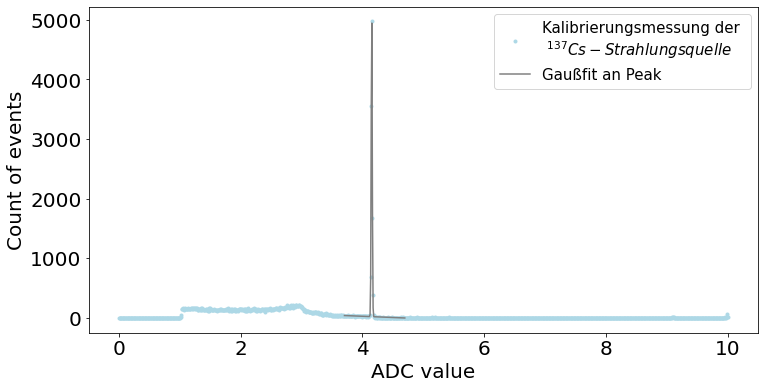

In [375]:
#cs-Eichung Halbleiterdetektor
adc = KollimatorGAmitte_adcvalue_cs
count = KollimatorGAmitte_counts_cs

gaussstart = 370
gaussstop = 470

parameters = {'xtick.labelsize': 20, 'ytick.labelsize': 20}
plt.rcParams.update(parameters)

#Energyspectrum open LG
fig, ax = plt.subplots(figsize=(12,6))

#Name for axis
ax.set_xlabel('ADC value', fontsize=20)
ax.set_ylabel('Count of events', fontsize=20)
#Plotten der unskalierten Kurven
ax.plot(adc, count,'o',markersize=3, color = "lightblue",label = "Kalibrierungsmessung der \n $^{137}Cs-Strahlungsquelle$")

#Gauß 662
#H, A, x, sigma, Afehler, fehlermü, fehlersd = gauss_fit(adc[gaussstart:gaussstop] , count[gaussstart:gaussstop])

#ax.vlines(4.15,0,12000)
startparameter = 600, -200, 10000, 4.152, 0.01
#startparameter = 5000,-1, 15000, 100, 20
#ax.plot(adc[gaussstart:gaussstop] , count[gaussstart:gaussstop], color = "grey", label="Gaußfit an Kalibrierungsmessung")
a, b, A, x0, sigma, afehler, bfehler, Afehler, x0fehler, sigmafehler = lin_gauss_fit(adc[gaussstart:gaussstop] , count[gaussstart:gaussstop],startparameter)
print(a, b, A, x0, sigma)
#print('MW:',round(x,3), 'pm', np.sqrt(fehlermü), 'SD:', round(sigma,3), 'pm', np.sqrt(fehlersd))
FWHM = round(2.35482 * sigma,4)
#print('FWHM:',FWHM11)

#ax.vlines(gaussstop,0,5000)

ax.plot(adc[gaussstart:gaussstop], lin_gauss(adc[gaussstart:gaussstop], a, b,A,x0,sigma), color = "grey", label="Gaußfit an Peak")
photopeak = 662
calibrationfactor = photopeak / x0 
calibrationfactorfehler = sigmafehler/x0
print("Y-Abschnitt Cs 662", a)
print("Steigung Cs 662", b)
print("Amplitude A Cs 662:",A)
print("Amplitude A Fehler Cs 662:",'{:f}'.format(Afehler))
print("Erwartungswert mu Cs 662:",x0)
print("Erwartungswert mu Fehler Cs 662:",'{:f}'.format(x0fehler))
print("Standardabweichung sigma Cs 662:",sigma)
print("Standardabweichung sigma Fehler Cs 662:",'{:f}'.format(sigmafehler))
print("Kalibrierungsfaktor Cs 662:",calibrationfactor)
print("Feher Kalibrierungsfaktor Cs 662:",'{:f}'.format(calibrationfactorfehler))
print("Energieauflösung Cs 662:", FWHM/x0)
energieaufloesungFehler=np.sqrt((2.35482/x0)**2*sigmafehler**2-(2.35482*sigma/(x0**2))*x0fehler**2)
print("Fehler Energieauflösung Cs 662:", '{:f}'.format(energieaufloesungFehler))
energy_calibration_y.append(x0)
energy_calibration_y_error.append(x0fehler)
energy_calibration_y_sigma.append(sigma)
energy_calibration_x.append(photopeak)
#Intensity using integral
sigmax3integration = integrate.quad(lambda integrator: gauss(integrator,0, A, x0, sigma),x0-3*sigma,x0+3*sigma)
analiticIntegral = A*sigma*np.sqrt(2*np.pi)
analiticalIntergralFehler = np.sqrt(2*np.pi)*np.sqrt((sigma*Afehler)**2+(A*sigmafehler)**2)
print("Anzahl gemessener Events aus Analytischem Integral: ", analiticIntegral)
print("Anzahl gemessener Events aus Analytischem Integral Fehler: ", analiticalIntergralFehler)

print("Anzahl gemessener Events in 3 sigma Intervall: ", sigmax3integration)
print("Comptonadc und -energie: ", adc[67], calibrationfactor*adc[67])

ax.legend(fontsize=15)
fig.savefig('Kalibrierungsmessung.png', dpi=200)

118.14259307208297 -25.735614710379952 2248.0118707133097 4.152748792624489 0.008881562858027632
Y-Abschnitt Cs 662 118.14259307208297
Steigung Cs 662 -25.735614710379952
Amplitude A Cs 662: 2248.0118707133097
Amplitude A Fehler Cs 662: 0.976583
Erwartungswert mu Cs 662: 4.152748792624489
Erwartungswert mu Fehler Cs 662: 0.000004
Standardabweichung sigma Cs 662: 0.008881562858027632
Standardabweichung sigma Fehler Cs 662: 0.000004
Kalibrierungsfaktor Cs 662: 159.41248388916483
Feher Kalibrierungsfaktor Cs 662: 0.000001
Energieauflösung Cs 662: 0.0050328110472561095
Fehler Energieauflösung Cs 662: 0.000003
Anzahl gemessener Events aus Analytischem Integral:  50.0469860332729
Anzahl gemessener Events aus Analytischem Integral Fehler:  0.033258669177452675
Anzahl gemessener Events in 3 sigma Intervall:  (49.911869377404294, 5.541330672857551e-13)
Comptonadc und -energie:  0.675 107.60342662518627


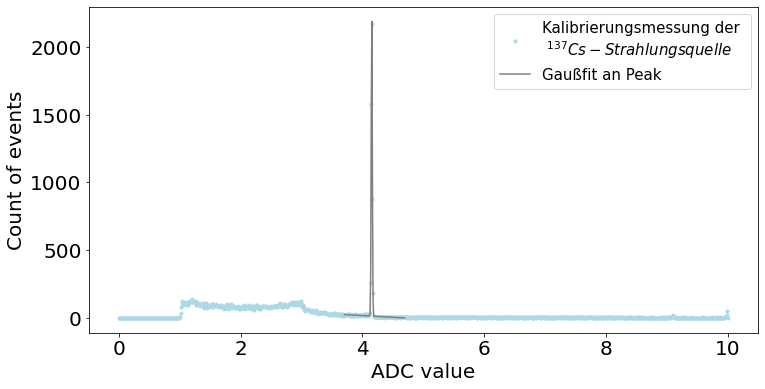

In [376]:
#cs-Eichung Halbleiterdetektor
adc = KollimatorGArand_adcvalue_cs
count = KollimatorGArand_counts_cs

gaussstart = 370
gaussstop = 470

parameters = {'xtick.labelsize': 20, 'ytick.labelsize': 20}
plt.rcParams.update(parameters)

#Energyspectrum open LG
fig, ax = plt.subplots(figsize=(12,6))

#Name for axis
ax.set_xlabel('ADC value', fontsize=20)
ax.set_ylabel('Count of events', fontsize=20)
#Plotten der unskalierten Kurven
ax.plot(adc, count,'o',markersize=3, color = "lightblue",label = "Kalibrierungsmessung der \n $^{137}Cs-Strahlungsquelle$")

#Gauß 662
#H, A, x, sigma, Afehler, fehlermü, fehlersd = gauss_fit(adc[gaussstart:gaussstop] , count[gaussstart:gaussstop])

#ax.vlines(4.15,0,12000)
startparameter = 600, -200, 10000, 4.152, 0.01
#startparameter = 5000,-1, 15000, 100, 20
#ax.plot(adc[gaussstart:gaussstop] , count[gaussstart:gaussstop], color = "grey", label="Gaußfit an Kalibrierungsmessung")
a, b, A, x0, sigma, afehler, bfehler, Afehler, x0fehler, sigmafehler = lin_gauss_fit(adc[gaussstart:gaussstop] , count[gaussstart:gaussstop],startparameter)
print(a, b, A, x0, sigma)
#print('MW:',round(x,3), 'pm', np.sqrt(fehlermü), 'SD:', round(sigma,3), 'pm', np.sqrt(fehlersd))
FWHM = round(2.35482 * sigma,4)
#print('FWHM:',FWHM11)

#ax.vlines(gaussstop,0,5000)

ax.plot(adc[gaussstart:gaussstop], lin_gauss(adc[gaussstart:gaussstop], a, b,A,x0,sigma), color = "grey", label="Gaußfit an Peak")
photopeak = 662
calibrationfactor = photopeak / x0 
calibrationfactorfehler = sigmafehler/x0
print("Y-Abschnitt Cs 662", a)
print("Steigung Cs 662", b)
print("Amplitude A Cs 662:",A)
print("Amplitude A Fehler Cs 662:",'{:f}'.format(Afehler))
print("Erwartungswert mu Cs 662:",x0)
print("Erwartungswert mu Fehler Cs 662:",'{:f}'.format(x0fehler))
print("Standardabweichung sigma Cs 662:",sigma)
print("Standardabweichung sigma Fehler Cs 662:",'{:f}'.format(sigmafehler))
print("Kalibrierungsfaktor Cs 662:",calibrationfactor)
print("Feher Kalibrierungsfaktor Cs 662:",'{:f}'.format(calibrationfactorfehler))
print("Energieauflösung Cs 662:", FWHM/x0)
energieaufloesungFehler=np.sqrt((2.35482/x0)**2*sigmafehler**2-(2.35482*sigma/(x0**2))*x0fehler**2)
print("Fehler Energieauflösung Cs 662:", '{:f}'.format(energieaufloesungFehler))
energy_calibration_y.append(x0)
energy_calibration_y_error.append(x0fehler)
energy_calibration_y_sigma.append(sigma)
energy_calibration_x.append(photopeak)
#Intensity using integral
sigmax3integration = integrate.quad(lambda integrator: gauss(integrator,0, A, x0, sigma),x0-3*sigma,x0+3*sigma)
analiticIntegral = A*sigma*np.sqrt(2*np.pi)
analiticalIntergralFehler = np.sqrt(2*np.pi)*np.sqrt((sigma*Afehler)**2+(A*sigmafehler)**2)
print("Anzahl gemessener Events aus Analytischem Integral: ", analiticIntegral)
print("Anzahl gemessener Events aus Analytischem Integral Fehler: ", analiticalIntergralFehler)

print("Anzahl gemessener Events in 3 sigma Intervall: ", sigmax3integration)
print("Comptonadc und -energie: ", adc[67], calibrationfactor*adc[67])

ax.legend(fontsize=15)
fig.savefig('Kalibrierungsmessung.png', dpi=200)